# Fraud Detection in Credit Card Transactions - A Data Analysis Approach

## Motivation

Since the onset of payment systems, illegal access of finances has become a huge problem. This is particularly a crucial problem in the modern era where transactions are completed online by entering credit card infromaton. This poses a great risk to organizations, consumers, banks and merchant since data breach can lead to monetary theft and loss of loyalty of customers degrading company's reputation. Fraud detection is a set of activities that are taken to prevent money or property from being obtained through false pretenses.  Merchants and issuers can deploy analytically based responses that use internal and external data to apply a set of business rules or analytical algorithms to detect fraud.

## Dataset description

The European cardholders dataset https://www.kaggle.com/mlg-ulb/creditcardfraud presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In this kernel we will implement several techniques to address the issue of unbalanced dataset. We will also develop predictive models using ANN and CNN to classify the transactions

# Importing Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches
import itertools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve,roc_auc_score,roc_curve, plot_precision_recall_curve

# Data Preparation

In [2]:
data = pd.read_csv('creditcard.csv') #uploading data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
unique_data = pd.DataFrame([data[c].value_counts().size for c in data.columns], index=data.columns, columns = ['count of unique values'])
unique_data

,count of unique values
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


In [6]:
data.iloc[:,:-1].describe() #descriptive statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [7]:
#descriptive statistics for class = 1 i.e. Fraudulent transactions
data[data['Class'] == 1].iloc[:,:-1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000


In [8]:
#descriptive statistics for class = 0 i.e. Non-Fraudulent transactions
data[data['Class'] == 0].iloc[:,:-1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [9]:
#identifying missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in the dataset

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
print('Non-Fraudulent transactions are', (round(data['Class'].value_counts()[0])),'i.e.', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraudulent transactions are', (round(data['Class'].value_counts()[1])),'i.e.',round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Non-Fraudulent transactions are 284315 i.e. 99.83 % of the dataset
Fraudulent transactions are 492 i.e. 0.17 % of the dataset


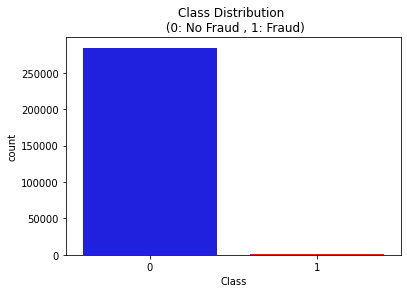

In [12]:
#count plot for class distribution
sns.countplot(data = data, x = 'Class',palette = ['blue','red'])
plt.title("Class Distribution \n (0: No Fraud , 1: Fraud)");

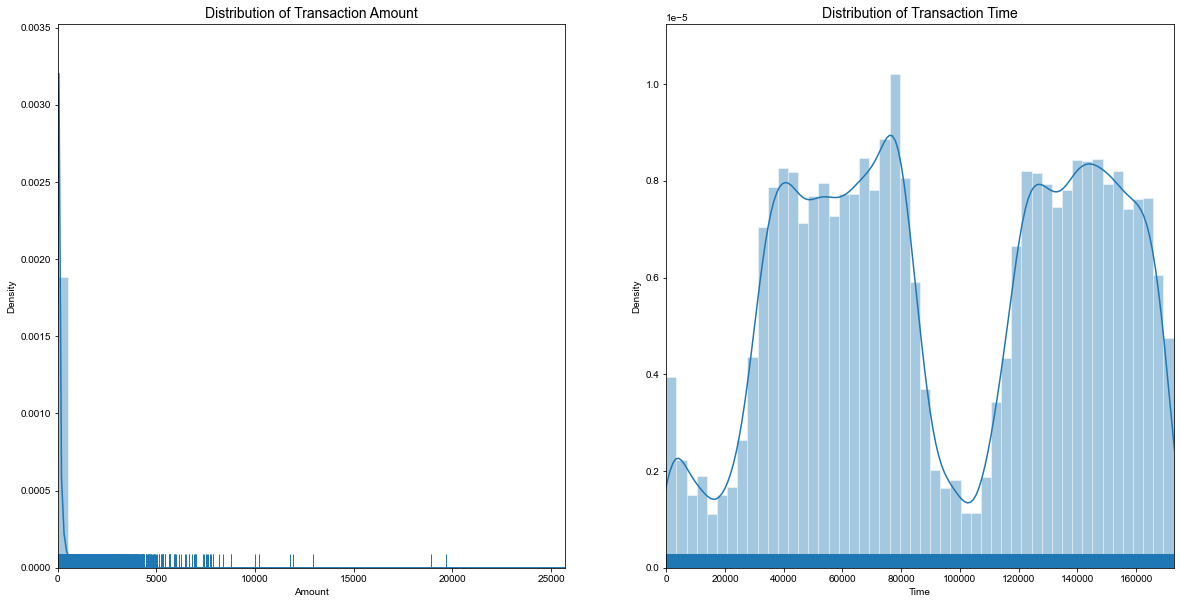

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.set_style('whitegrid')
sns.distplot(data['Amount'], kde = True, rug = True,ax =ax[0])
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(data['Amount']), max(data['Amount'])])

sns.distplot(data['Time'], kde = True, rug = True,ax =ax[1])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Density')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(data['Time']), max(data['Time'])])
plt.show()

### Observations

* There are no missing values in the dataset.
* The dataset is heavily imbalanced with non-fraudulent transactions accounting for 99.83 % of the dataset and fraudulent transactions account for 0.17 % of the dataset.
* Transaction amounts are relatively small with mean of approximately 88 USD


# Exploratory data analysis

### Time Series Analysis

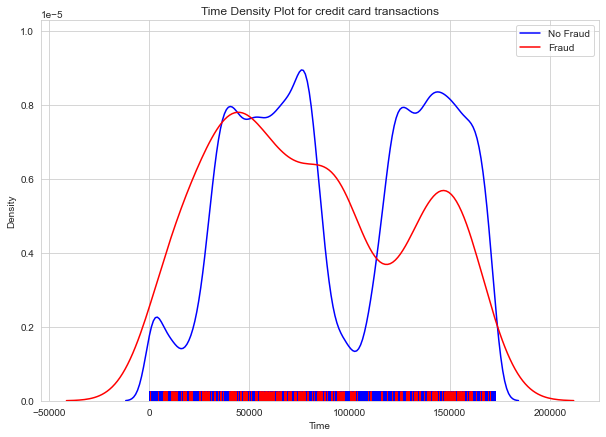

In [14]:
#time density plot for credit card transactions
plt.figure(figsize = (10,7))
sns.distplot(data[data['Class'] == 0]["Time"], hist=False, color ='blue',rug=True)
sns.distplot(data[data['Class'] == 1]["Time"], hist=False, color = 'red', rug=True)
plt.title('Time Density Plot for credit card transactions')
plt.legend(['No Fraud','Fraud'])


Normal transcations show a comparitively uneven distribution as compared to fraudulent transactions that are equally distributed in time. Observe that fraudulent transactions show comparitively higher activity at night (European time zone) as compared to non fraudulent transactions.

Lets looks at the transaction statistics per hour for both the classes

In [15]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
stat = pd.DataFrame(tmp)
stat.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
stat.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


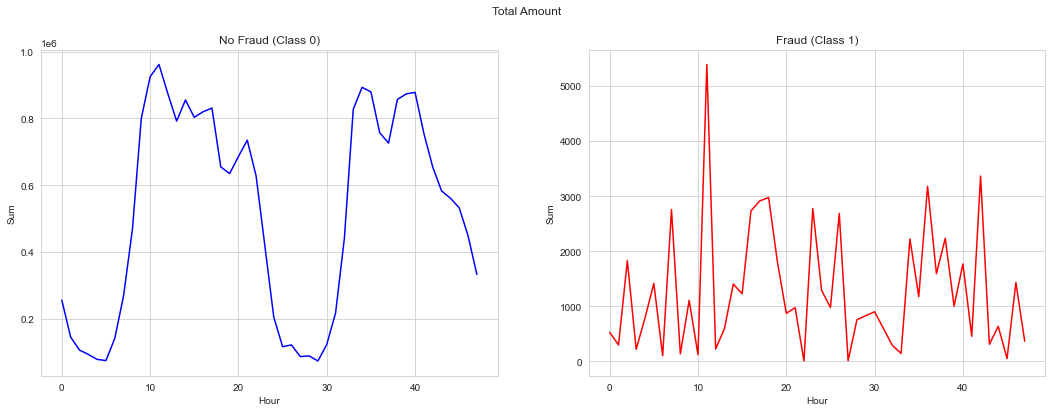

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(x="Hour", y="Sum", data=stat.loc[stat.Class==0], color = "blue",ax = ax1)
ax1.set_title('No Fraud (Class 0)')
s = sns.lineplot(x="Hour", y="Sum", data=stat.loc[stat.Class==1], color="red",ax = ax2)
ax2.set_title('Fraud (Class 1)')
plt.suptitle("Total Amount")
plt.show();

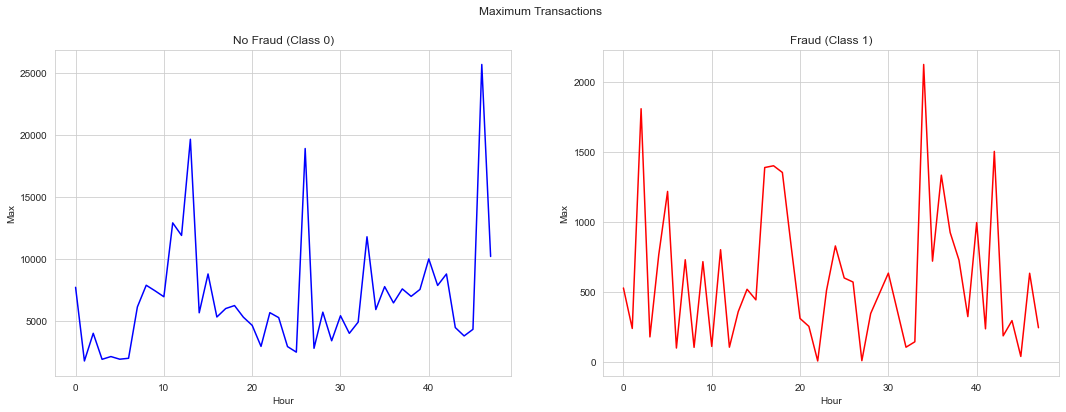

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(x="Hour", y="Max", data=stat.loc[stat.Class==0], color = "blue",ax = ax1)
ax1.set_title('No Fraud (Class 0)')
s = sns.lineplot(x="Hour", y="Max", data=stat.loc[stat.Class==1], color="red",ax = ax2)
ax2.set_title('Fraud (Class 1)')
plt.suptitle("Maximum Transactions")
plt.show();

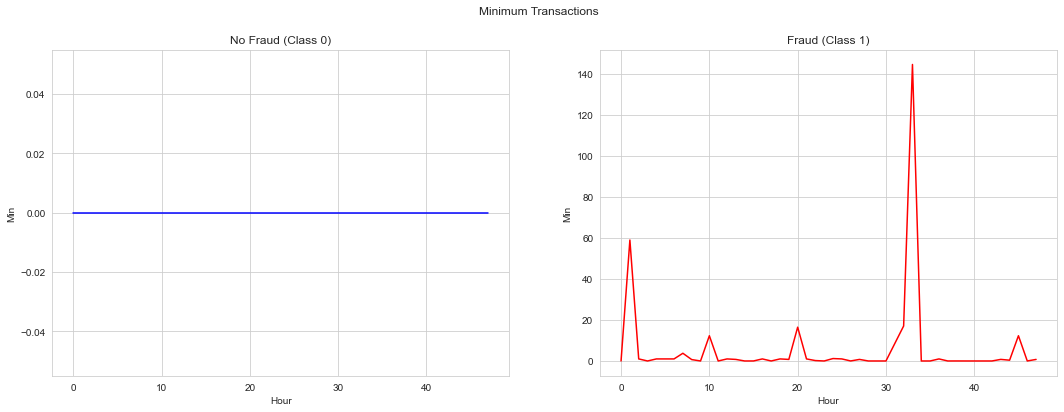

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(x="Hour", y="Min", data=stat.loc[stat.Class==0], color = "blue",ax = ax1)
ax1.set_title('No Fraud (Class 0)')
s = sns.lineplot(x="Hour", y="Min", data=stat.loc[stat.Class==1], color="red",ax = ax2)
ax2.set_title('Fraud (Class 1)')
plt.suptitle("Minimum Transactions")
plt.show();

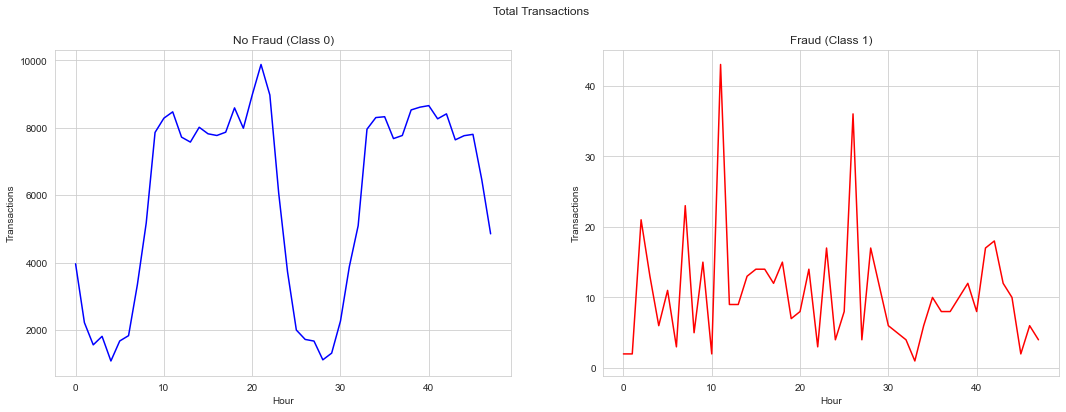

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(x="Hour", y="Transactions", data=stat.loc[stat.Class==0], color = "blue",ax = ax1)
ax1.set_title('No Fraud (Class 0)')
s = sns.lineplot(x="Hour", y="Transactions", data=stat.loc[stat.Class==1], color="red",ax = ax2)
ax2.set_title('Fraud (Class 1)')
plt.suptitle("Total Transactions")
plt.show();

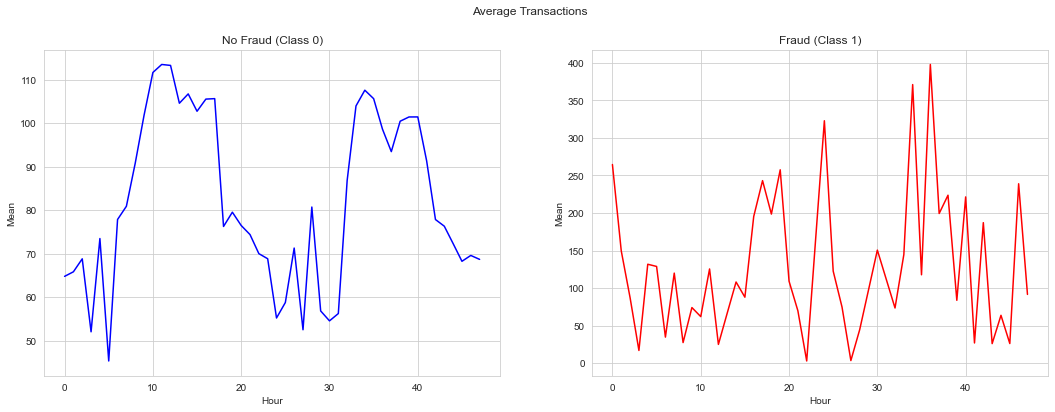

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(x="Hour", y="Mean", data=stat.loc[stat.Class==0], color = "blue",ax = ax1)
ax1.set_title('No Fraud (Class 0)')
s = sns.lineplot(x="Hour", y="Mean", data=stat.loc[stat.Class==1], color="red",ax = ax2)
ax2.set_title('Fraud (Class 1)')
plt.suptitle("Average Transactions")
plt.show();

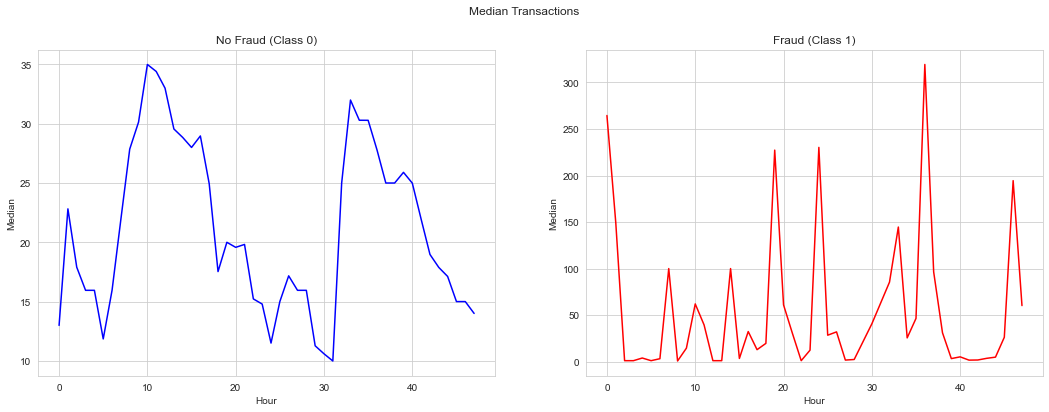

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(x="Hour", y="Median", data=stat.loc[stat.Class==0], color = "blue",ax = ax1)
ax1.set_title('No Fraud (Class 0)')
s = sns.lineplot(x="Hour", y="Median", data=stat.loc[stat.Class==1], color="red",ax = ax2)
ax2.set_title('Fraud (Class 1)')
plt.suptitle("Median Transactions")
plt.show();

### Box plots for transaction amount

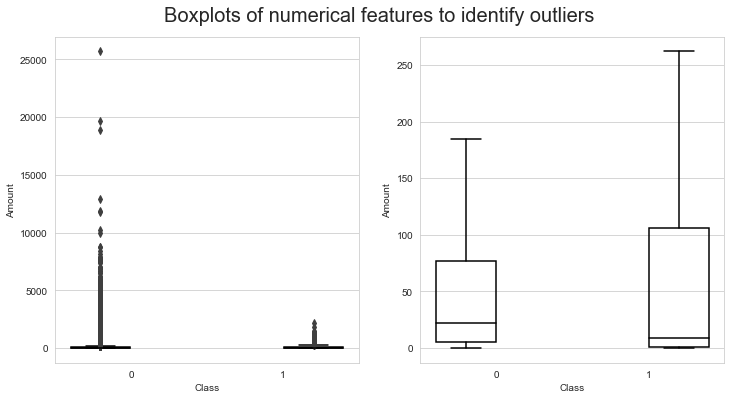

In [22]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data = data, x="Class", y='Amount', hue="Class",ax = ax1,showfliers=True, **PROPS)
ax1.legend().set_visible(False)
sns.boxplot(data = data, x="Class", y='Amount', hue="Class",ax = ax2, showfliers=False, **PROPS)
ax2.legend().set_visible(False)
plt.suptitle('Boxplots of numerical features to identify outliers', y = 0.95,fontsize = 20)
plt.show();

In [23]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transactions have a smaller mean value, larger Q1 and Q2 and smaller Q3 with larger outliers; fraudulent transactions have a larger mean, smaller Q1 and Q2, larger Q3 and smaller outliers.

# Data transformation

### Splitting the data into train set and test set

Before proceeding with further transformation and analysis we need to split the data into training and testing set. 

In [25]:
X = data.iloc[:,:-2]
y = data.iloc[:,-2]

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)

In [28]:
print('Label Distributions: \n')
print(train_counts_label/ len(ytrain))
print(test_counts_label/ len(ytest))

Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [29]:
train_data = pd.concat([Xtrain, ytrain], axis = 1).reset_index(drop = True)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,0
1,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0
2,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0
3,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0
4,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0


In [30]:
test_data = pd.concat([Xtest, ytest], axis = 1).reset_index(drop = True)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


### Normalization and Standardization

Standardization is calculated by subtracting the mean value and dividing by the standard deviation.

value = (value – mean) / stdev. 

When the data contains outliers i.e. values on the edge of the distribution that may have a low probability of occurrence, the distribution can be skewed making data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers. An approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable. This is called robust standardization or robust data scaling. This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles. 

value = (value – median) / (p75 – p25)
The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.

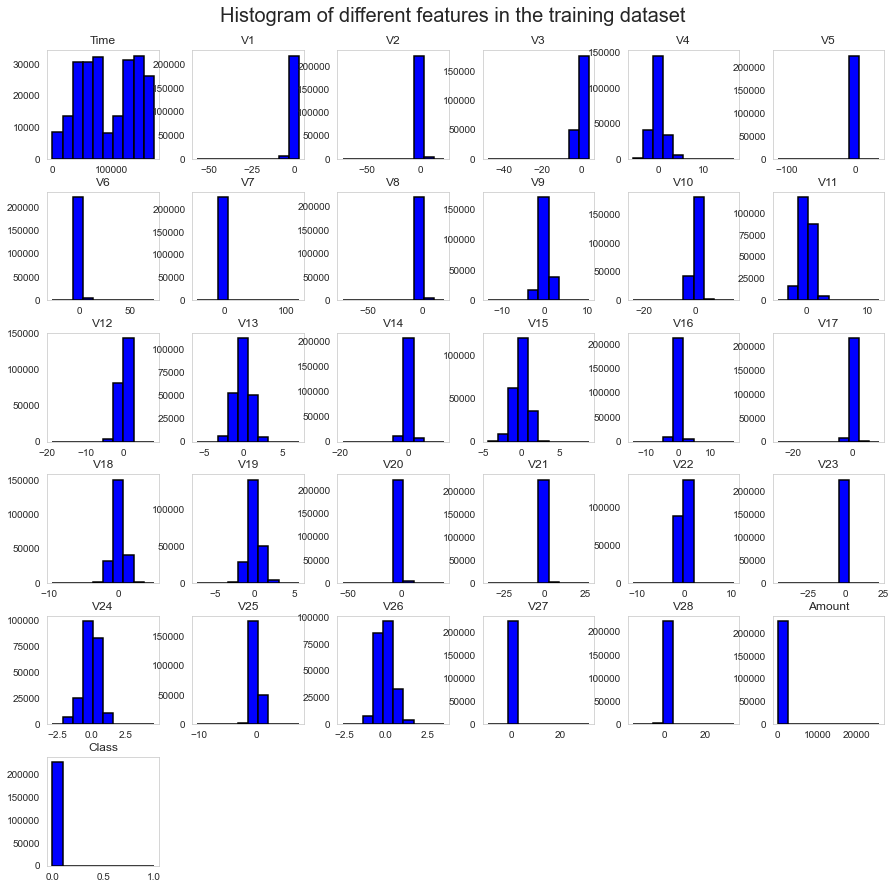

In [31]:
train_data.hist(figsize = (15,15), grid = False, color = "blue", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Histogram of different features in the training dataset',fontsize = 20,y= 0.92)
plt.show()

The above histograms shows that most of the features have their distributions skewed. Appropriate techniques to make the distributions less skewed can be applied.

Some of the features are not spread so appropriate normalization needs to be applied. The end goal of normalization is to spread the data over the normalized range to yield maximum information from the given data. An ideal normalization technique for any given dataset will take all of the data points and redistribute them as evenly as possible across the new range. The appropriate normalization technique to be used is dependent on the data at hand. For this reason, to achieve optimal data normalization, each feature should be analyzed independently to determine its distribution and consequentially its optimal normalization technique. Having equal range in all dimensions is important so as to avoid biases.

In [32]:
Xtrain_n = Xtrain.copy() #data that will be normalized

<AxesSubplot:>

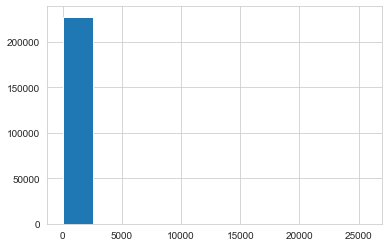

In [33]:
Xtrain_n['Amount'].hist()

We need to spread the amount data since it is highly skewed

<AxesSubplot:>

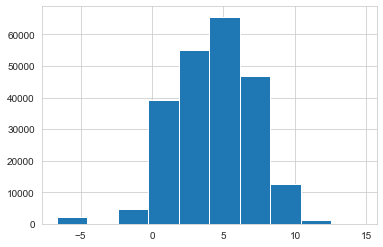

In [34]:
Xtrain_n['Amount'] = np.log2(Xtrain['Amount'] + 0.01) #spreading the amount data using log normalization technique
Xtrain_n['Amount'].hist()

In [35]:
#identifying missing values
Xtrain_n['Amount'].isnull().sum()

0

In [36]:
Xtest_n = Xtest.copy()

<AxesSubplot:>

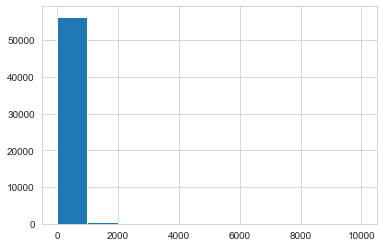

In [37]:
Xtest_n['Amount'].hist()

<AxesSubplot:>

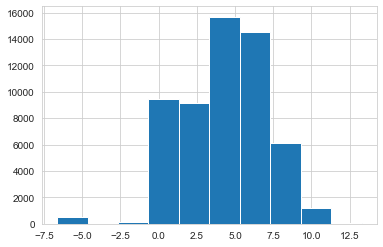

In [38]:
Xtest_n['Amount'] = np.log2(Xtest['Amount'] + 0.01) #spreading the amount data using log normalization technique
Xtest_n['Amount'].hist()

Let us now use a combination of tanh normalization and robust scaler for transforming the data i.e. spreading the data and scaling it in the range [-1,1]

In [39]:
m = np.mean(Xtrain_n, axis=0) # array([16.25, 26.25])
std = np.std(Xtrain_n, axis=0) # array([17.45530005, 22.18529919])
md = np.median(Xtrain_n,axis = 0)
p75 = np.percentile(Xtrain_n,75,axis = 0)
p25 = np.percentile(Xtrain_n,25,axis = 0)

In [40]:
Xtrain_n = np.tanh((Xtrain_n - md) / (p75 - p25)) #normalization and feature scaling for train set

In [41]:
Xtest_n = np.tanh((Xtest_n - md) / (p75 - p25)) #normalization and feature scaling for test set

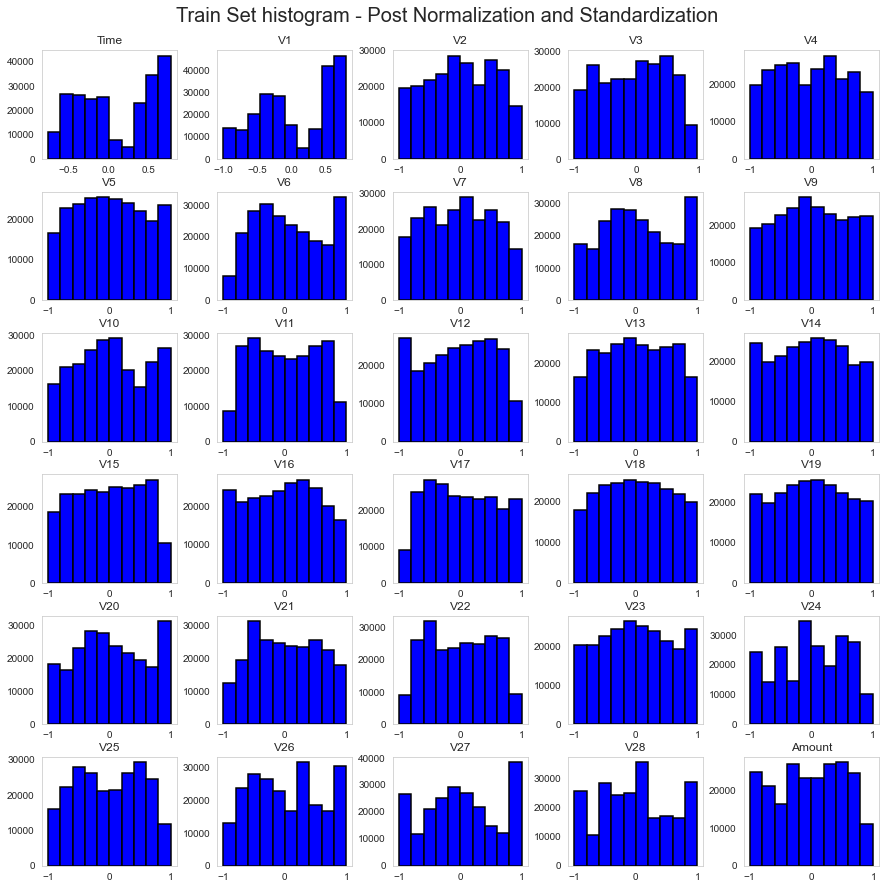

In [42]:
Xtrain_n.hist(figsize = (15,15), grid = False, color = "blue", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Train Set histogram - Post Normalization and Standardization',fontsize = 20,y= 0.92)
plt.show()

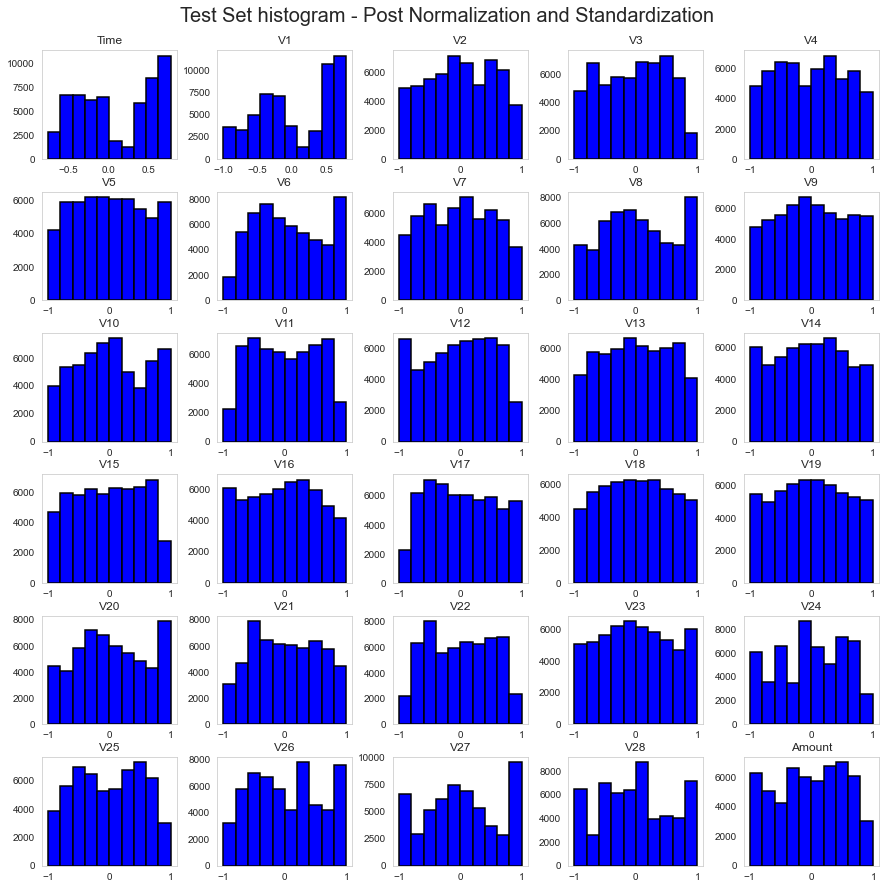

In [43]:
Xtest_n.hist(figsize = (15,15), grid = False, color = "blue", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Test Set histogram - Post Normalization and Standardization',fontsize = 20,y= 0.92)
plt.show()

All our features have been spread and scaled in the range [-1,1]

### Outlier Removal

After normalizing and standardizing our data, the next step is to remove outliers. Outliers can significantly affect the statistical information conveyed by the distribution of the features. Our main aim in this section is to remove "extreme outliers". The presence of outliers is key in anomaly detection because it helps to identify data points, events, and/or observations that deviate from a dataset's normal behavior. Careful judgement should be performed for setting the threshold to removee outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect. We specifically want to focus on removing "extreme outliers" rather than just outliers to avoid the risk of information loss that may cause our models to have a lower accuracy.

In [44]:
#remove outliers
def outlier_removal(X,thresh = 1.5):
    X_copy = X.copy()
    for x in X.columns:
        q75,q25 = np.percentile(X.loc[:,x],[75,25])
        intr_qr = q75-q25

        max_val = q75+(thresh*intr_qr)
        min_val = q25-(thresh*intr_qr)

        X_copy.loc[X[x] < min_val,x] = np.nan
        X_copy.loc[X[x] > max_val,x] = np.nan
    return X_copy

In [45]:
thresh = 1.5
Xtrain_O  = outlier_removal(Xtrain_n,thresh)
Xtest_O = outlier_removal(Xtest_n,thresh)

In [46]:
Xtrain_O.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [47]:
Xtrain_O = Xtrain_O.dropna(axis = 0)
#XtrainO.isnull().sum()

In [48]:
Xtest_O.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [49]:
Xtrain_O = Xtrain_O.dropna(axis = 0)
#XtrainO.isnull().sum()

In [50]:
train_data_O = pd.concat([Xtrain_O,ytrain],axis = 1)

After our normalization and standardization the resulting data doesnt show any outliers.

### Dealing with Imbalance dataset

From the initial analysis we have observed that this dataset is heavily imbalanced with non-fraudulent transactions accounting for 99.83 % of the dataset and fraudulent transactions account for 0.17 % of the dataset. We need to create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.Our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Using the imbalanced dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set. Thats why we do data balancing only on the train set

### Random Undersampling

In random undersampling we remove data in order to have a more balanced dataset and avoid overfitting.
After random undersampling we will have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Following that we shuffle the data to see if our models can maintain a certain accuracy everytime we run this script. The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [51]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_data_ru = pd.concat([Xtrain_O,ytrain],axis = 1)
train_data_ru = train_data_ru.sample(frac=1)

# amount of fraud classes 492 rows.
fraud = train_data_ru.loc[train_data_ru['Class'] == 1]
non_fraud = train_data_ru.loc[train_data_ru['Class'] == 0][:len(fraud)]

train_data_ru = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
train_data_ru = train_data_ru.sample(frac=1, random_state=42).reset_index(drop = True)
Xtrain_ru = train_data_ru.drop(['Class'],axis = 1)
ytrain_ru = train_data_ru['Class']

train_data_ru.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.583196,0.442203,-0.385047,0.500082,0.094850,-0.746500,0.024581,-0.595738,0.253207,0.596696,...,0.006040,-0.016569,0.148517,0.618865,0.039540,0.943969,-0.277807,0.031928,0.303321,0
1,0.294499,-0.600367,0.913053,-0.996578,0.972799,-0.075803,-0.754388,-0.998145,0.990147,-0.814387,...,0.921103,-0.071200,-0.913772,-0.465486,0.053186,0.965383,0.993929,-0.715309,-0.856321,1
2,-0.576461,-1.000000,1.000000,-1.000000,0.999473,-1.000000,-0.999378,-1.000000,1.000000,-0.993082,...,0.999728,-0.972889,-0.999829,0.177315,0.997182,-0.269142,0.999999,0.989600,0.520910,1
3,-0.590358,-1.000000,1.000000,-1.000000,0.999258,-1.000000,-0.998671,-1.000000,1.000000,-0.995587,...,0.999659,-0.919548,-0.997513,0.128422,0.983312,-0.289827,1.000000,0.996978,0.520910,1
4,0.642221,-0.958155,0.747207,-0.972314,0.952959,-0.016533,-0.902114,-0.988952,-0.927291,0.673364,...,-0.260087,-0.692787,-0.973916,-0.454760,0.061535,-0.958892,-1.000000,0.999960,-0.814357,1


In [52]:
train_data_ru.shape

(788, 31)

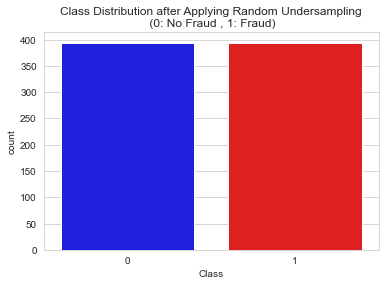

In [53]:
#count plot for class distribution
sns.countplot(data = train_data_ru, x = 'Class',palette = ['blue','red'])
plt.title("Class Distribution after Applying Random Undersampling\n (0: No Fraud , 1: Fraud)");

### Near Miss Algorithm

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.
There are three versions of the technique, named NearMiss-1, NearMiss-2, and NearMiss-3.
* NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
* NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
* NearMiss-3: Majority class examples with minimum distance to each minority class example.

The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.
The n_neighbors_ver3 argument determines the number of examples to select for each minority example, although the desired balancing ratio set via sampling_strategy will filter this so that the desired balance is achieved.


In [54]:
nm = NearMiss(version = 3, n_neighbors_ver3=3)
Xtrain_nm, ytrain_nm = nm.fit_resample(Xtrain_O, ytrain)
print(Xtrain_nm.shape,ytrain_nm.shape)

(779, 30) (779,)


In [55]:
train_data_nm = pd.concat([Xtrain_nm, ytrain_nm],axis = 1)
train_data_nm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.290741,0.021849,-0.628809,0.046457,-0.835459,0.963686,-0.980367,-0.999327,-0.998344,-0.436885,...,0.994252,-0.935188,-1.000000,0.267545,-0.956719,-0.676588,0.996851,0.997789,-0.037288,0
1,0.599095,-0.911875,0.342613,-0.704554,-0.268072,0.893018,-0.726627,-0.588081,-0.999304,-0.861492,...,-0.984444,0.742541,-0.999832,-0.399506,0.962516,0.906296,0.806762,-0.999867,-0.226813,0
2,0.583878,-0.488351,0.770995,-0.549036,0.097988,-0.522043,-0.697117,-0.734418,-0.999446,-0.330526,...,-0.937272,0.921558,0.863076,0.789889,-0.596031,-0.318797,-0.993908,-0.850176,-0.826141,0
3,-0.474668,-0.737427,0.791203,0.636721,0.742806,-0.439667,0.974394,-0.961674,-1.000000,0.337174,...,-0.999998,0.503150,0.891495,-0.085985,-0.762938,-0.756601,-0.999980,-0.999655,-0.006645,0
4,0.752128,-0.610459,0.867066,-0.512752,-0.102218,0.248785,0.072928,-0.785898,-1.000000,-0.441694,...,-0.999980,0.842618,0.779112,-0.102204,-0.423910,-0.402853,-0.949266,-0.505715,-0.826141,0


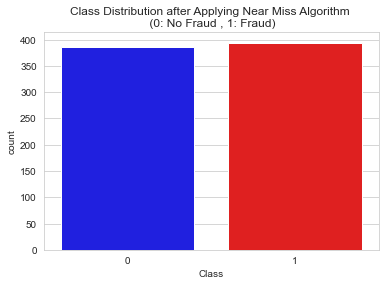

In [56]:
#count plot for class distribution
sns.countplot(data = train_data_nm, x = 'Class',palette = ['blue','red'])
plt.title("Class Distribution after Applying Near Miss Algorithm \n (0: No Fraud , 1: Fraud)");

### SMOTE

SMOTE is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general. SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1% of the cases have the target value A (the minority class), and 99% of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the module's properties.

In [57]:
Xtrain_sm,ytrain_sm=SMOTE().fit_resample(Xtrain_O,ytrain)

In [58]:
train_data_sm = pd.concat([Xtrain_sm, ytrain_sm],axis = 1)
train_data_sm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.597194,0.699599,-0.308368,-0.252266,0.217187,-0.336152,0.160580,-0.534238,0.025671,0.711435,...,0.568757,0.716125,0.203277,-0.381560,-0.089690,-0.282078,0.263463,-0.417895,-0.292258,0
1,0.363842,-0.185248,-0.457650,0.615824,-0.849721,-0.040792,0.363153,-0.020760,-0.658899,0.073005,...,-0.289995,0.370415,0.380605,-0.865492,-0.945055,0.622079,-0.979704,-0.829962,0.273398,0
2,0.642104,0.024389,0.491640,-0.368242,-0.407866,0.702986,-0.072499,0.581638,0.175504,-0.065044,...,-0.596090,-0.675513,0.294668,0.134348,-0.583804,0.293267,0.851847,0.420469,-0.227416,0
3,0.104882,-0.242460,0.589319,0.675174,0.941823,0.402625,0.799270,0.615925,-0.190855,0.327411,...,0.220892,0.387799,-0.198181,0.472042,-0.762858,-0.223222,-0.523576,-0.522997,0.564192,0
4,-0.024096,-0.947774,0.863347,-0.307452,-0.005414,-0.548474,-0.174692,-0.400922,0.983991,0.440142,...,-0.795916,-0.216885,0.688084,0.032244,0.592734,0.480191,0.942359,-0.987669,0.060108,0


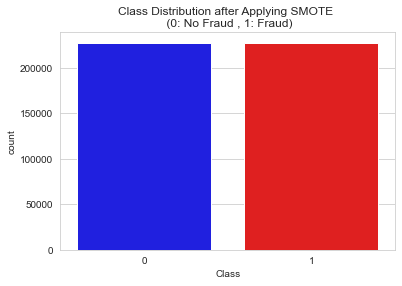

In [59]:
#count plot for class distribution
sns.countplot(data = train_data_sm, x = 'Class',palette = ['blue','red'])
plt.title("Class Distribution after Applying SMOTE \n (0: No Fraud , 1: Fraud)");

### Dimensionality reduction techniques to visualize our clusters 

In [60]:
def dimension_reduction(X):
    # T-SNE Implementation
    t0 = time.time()
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
    t1 = time.time()
    print("T-SNE took {:.2} s".format(t1 - t0))

    # PCA Implementation
    t2 = time.time()
    X_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
    t3 = time.time()
    print("PCA took {:.2} s".format(t3 - t2))

    # TruncatedSVD
    t4 = time.time()
    X_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
    t5 = time.time()
    print("Truncated SVD took {:.2} s".format(t5 - t4))
    return X_tsne,X_pca,X_svd

In [61]:
def plot_clusters(X_tsne,X_pca,X_svd,y,text):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
    f.suptitle('Visualizing clusters using Dimensionality Reduction techniques for ' + text , fontsize=20)


    # t-SNE scatter plot
    ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax1.set_title('t-SNE', fontsize=14)
    ax1.set_xlabel('Component 1')
    ax1.set_ylabel('Component 2')

    ax1.grid(True)

    ax1.legend()


    # PCA scatter plot
    ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax2.set_title('PCA', fontsize=14)
    ax2.set_xlabel('Component 1')
    ax2.set_ylabel('Component 2')

    ax2.grid(True)

    ax2.legend()

    # TruncatedSVD scatter plot
    ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax3.set_title('Truncated SVD', fontsize=14)
    ax3.set_xlabel('Component 1')
    ax3.set_ylabel('Component 2')

    ax3.grid(True)

    ax3.legend()

    plt.show()

In [62]:
X_tsne,X_pca,X_svd = dimension_reduction(Xtrain_ru)

T-SNE took 7.1 s
PCA took 0.0 s
Truncated SVD took 0.016 s


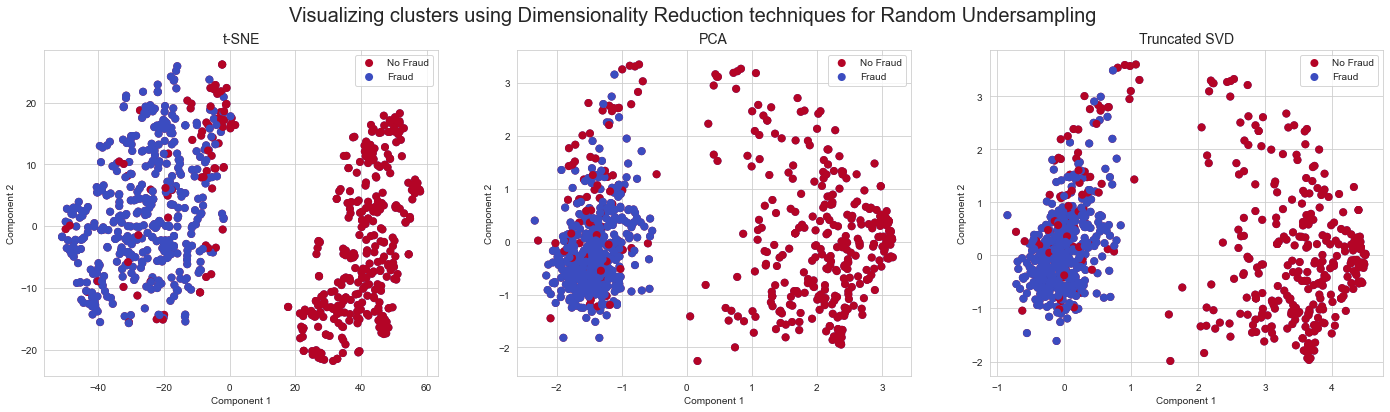

In [63]:
plot_clusters(X_tsne,X_pca,X_svd,ytrain_ru,'Random Undersampling')
plt.show()

In [64]:
X_tsne,X_pca,X_svd = dimension_reduction(Xtrain_nm)

T-SNE took 5.2 s
PCA took 0.0 s
Truncated SVD took 0.016 s


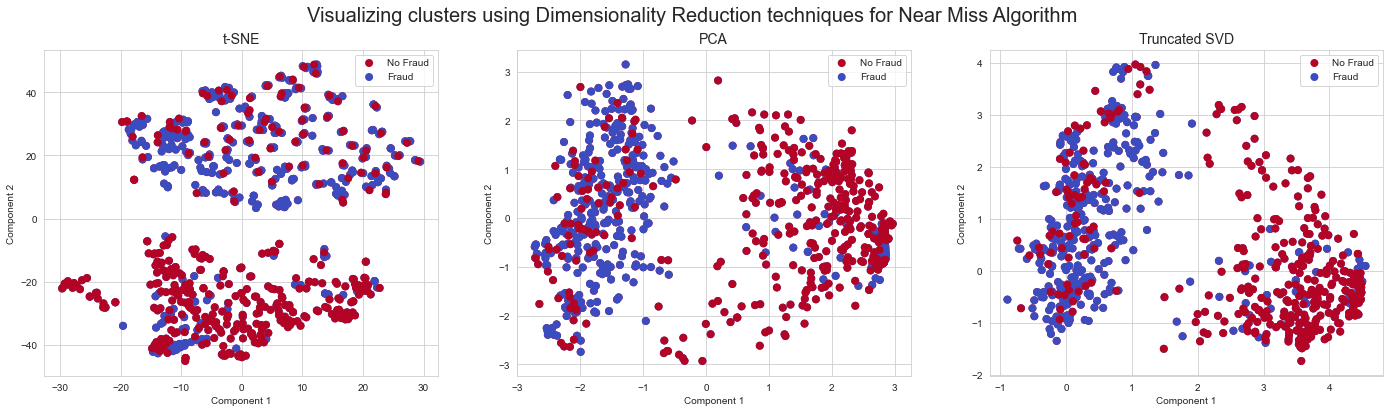

In [65]:
plot_clusters(X_tsne,X_pca,X_svd,ytrain_nm,'Near Miss Algorithm')
plt.show()

### Correlation Analysis

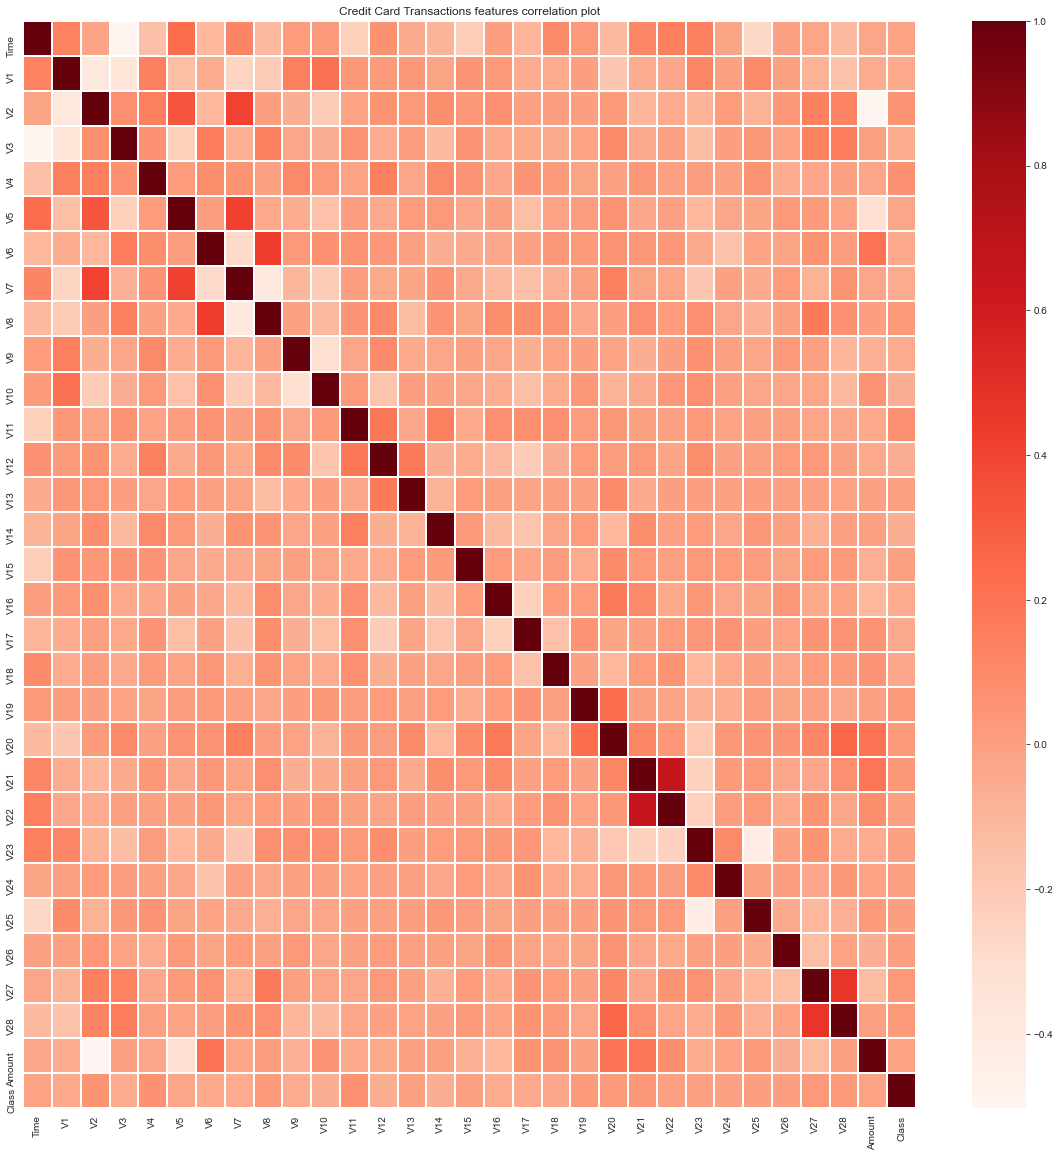

In [66]:
plt.figure(figsize = (20,20))  
plt.title('Credit Card Transactions features correlation plot')
corr = train_data_O.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap="Reds")
plt.show()

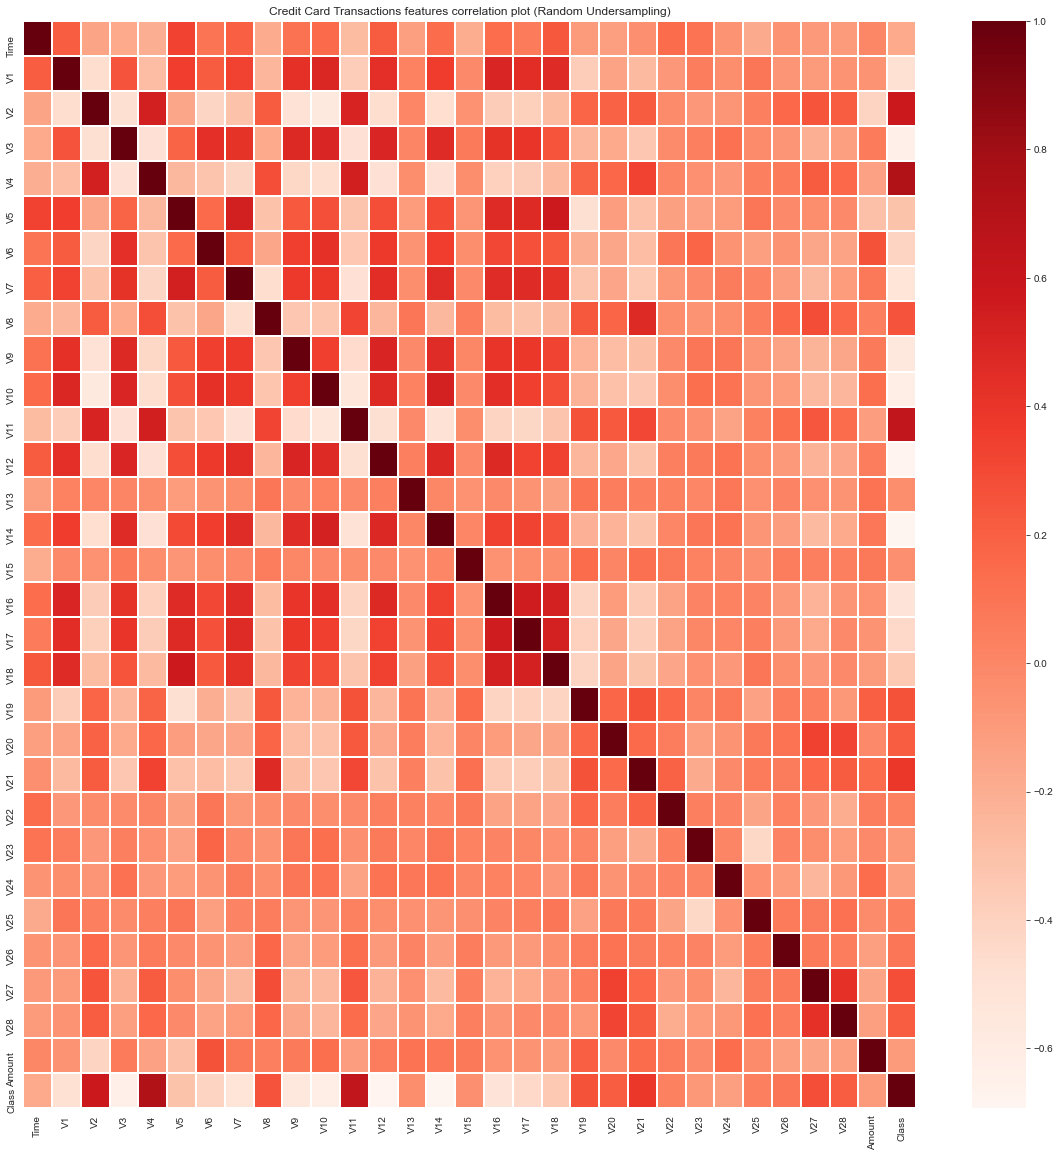

In [67]:
plt.figure(figsize = (20,20))  
plt.title('Credit Card Transactions features correlation plot (Random Undersampling)')
corr = train_data_ru.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap="Reds")
plt.show()

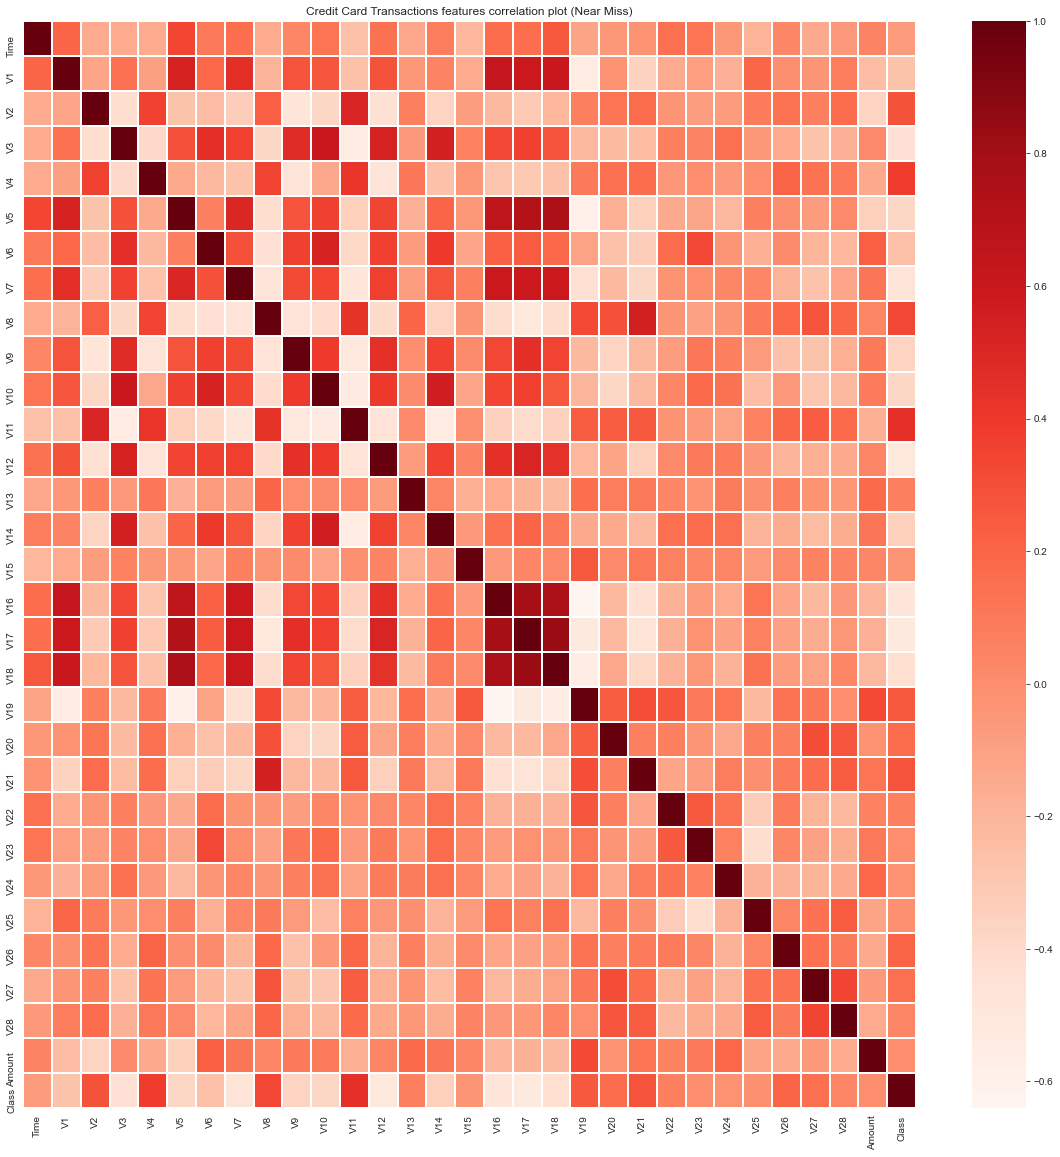

In [68]:
plt.figure(figsize = (20,20))  
plt.title('Credit Card Transactions features correlation plot (Near Miss)')
corr = train_data_nm.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap="Reds")
plt.show()

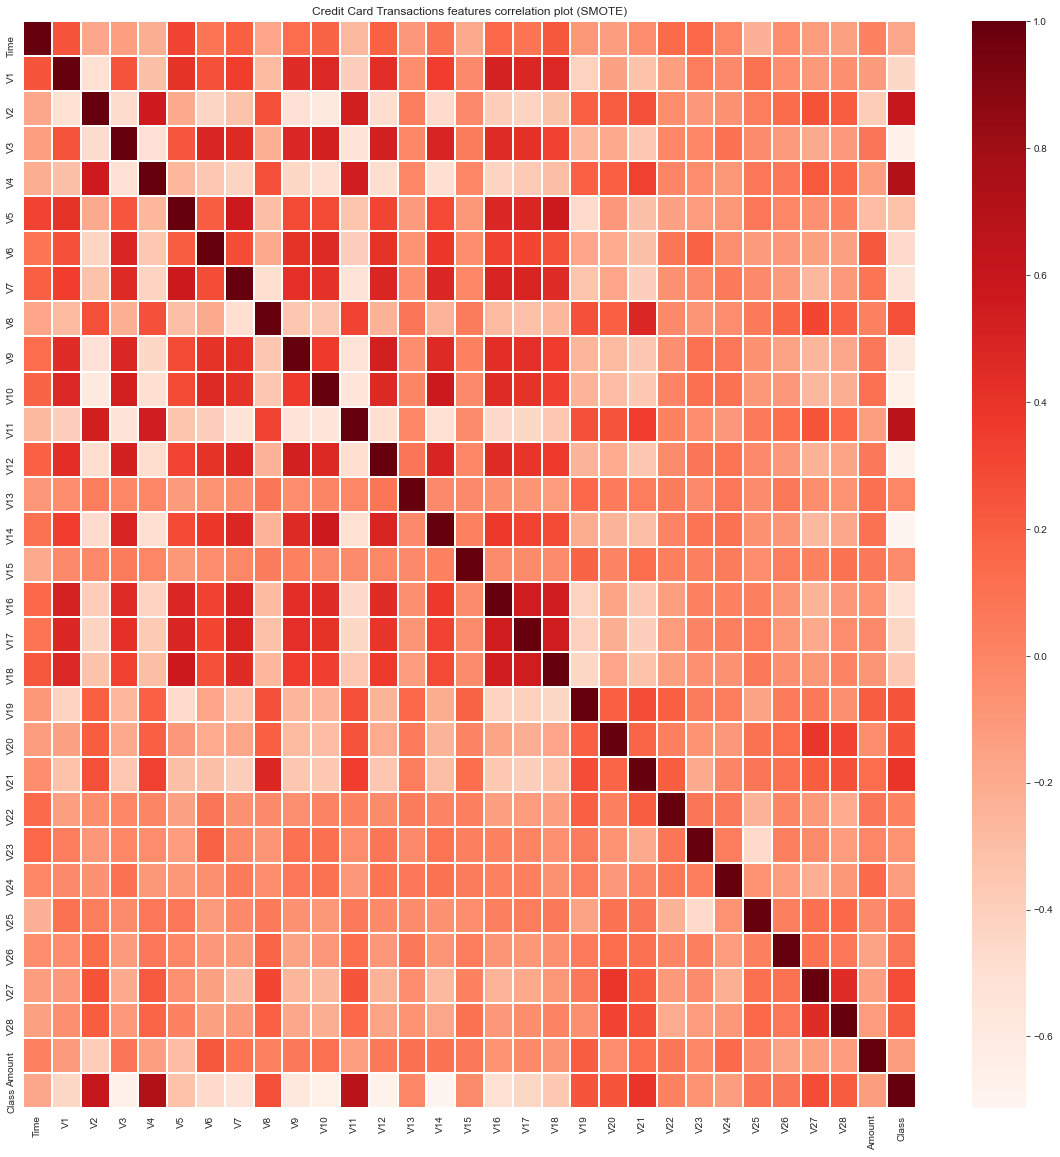

In [69]:
plt.figure(figsize = (20,20))  
plt.title('Credit Card Transactions features correlation plot (SMOTE)')
corr = train_data_sm.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap="Reds")
plt.show()

Text(0, 0.5, 'Correlation values')

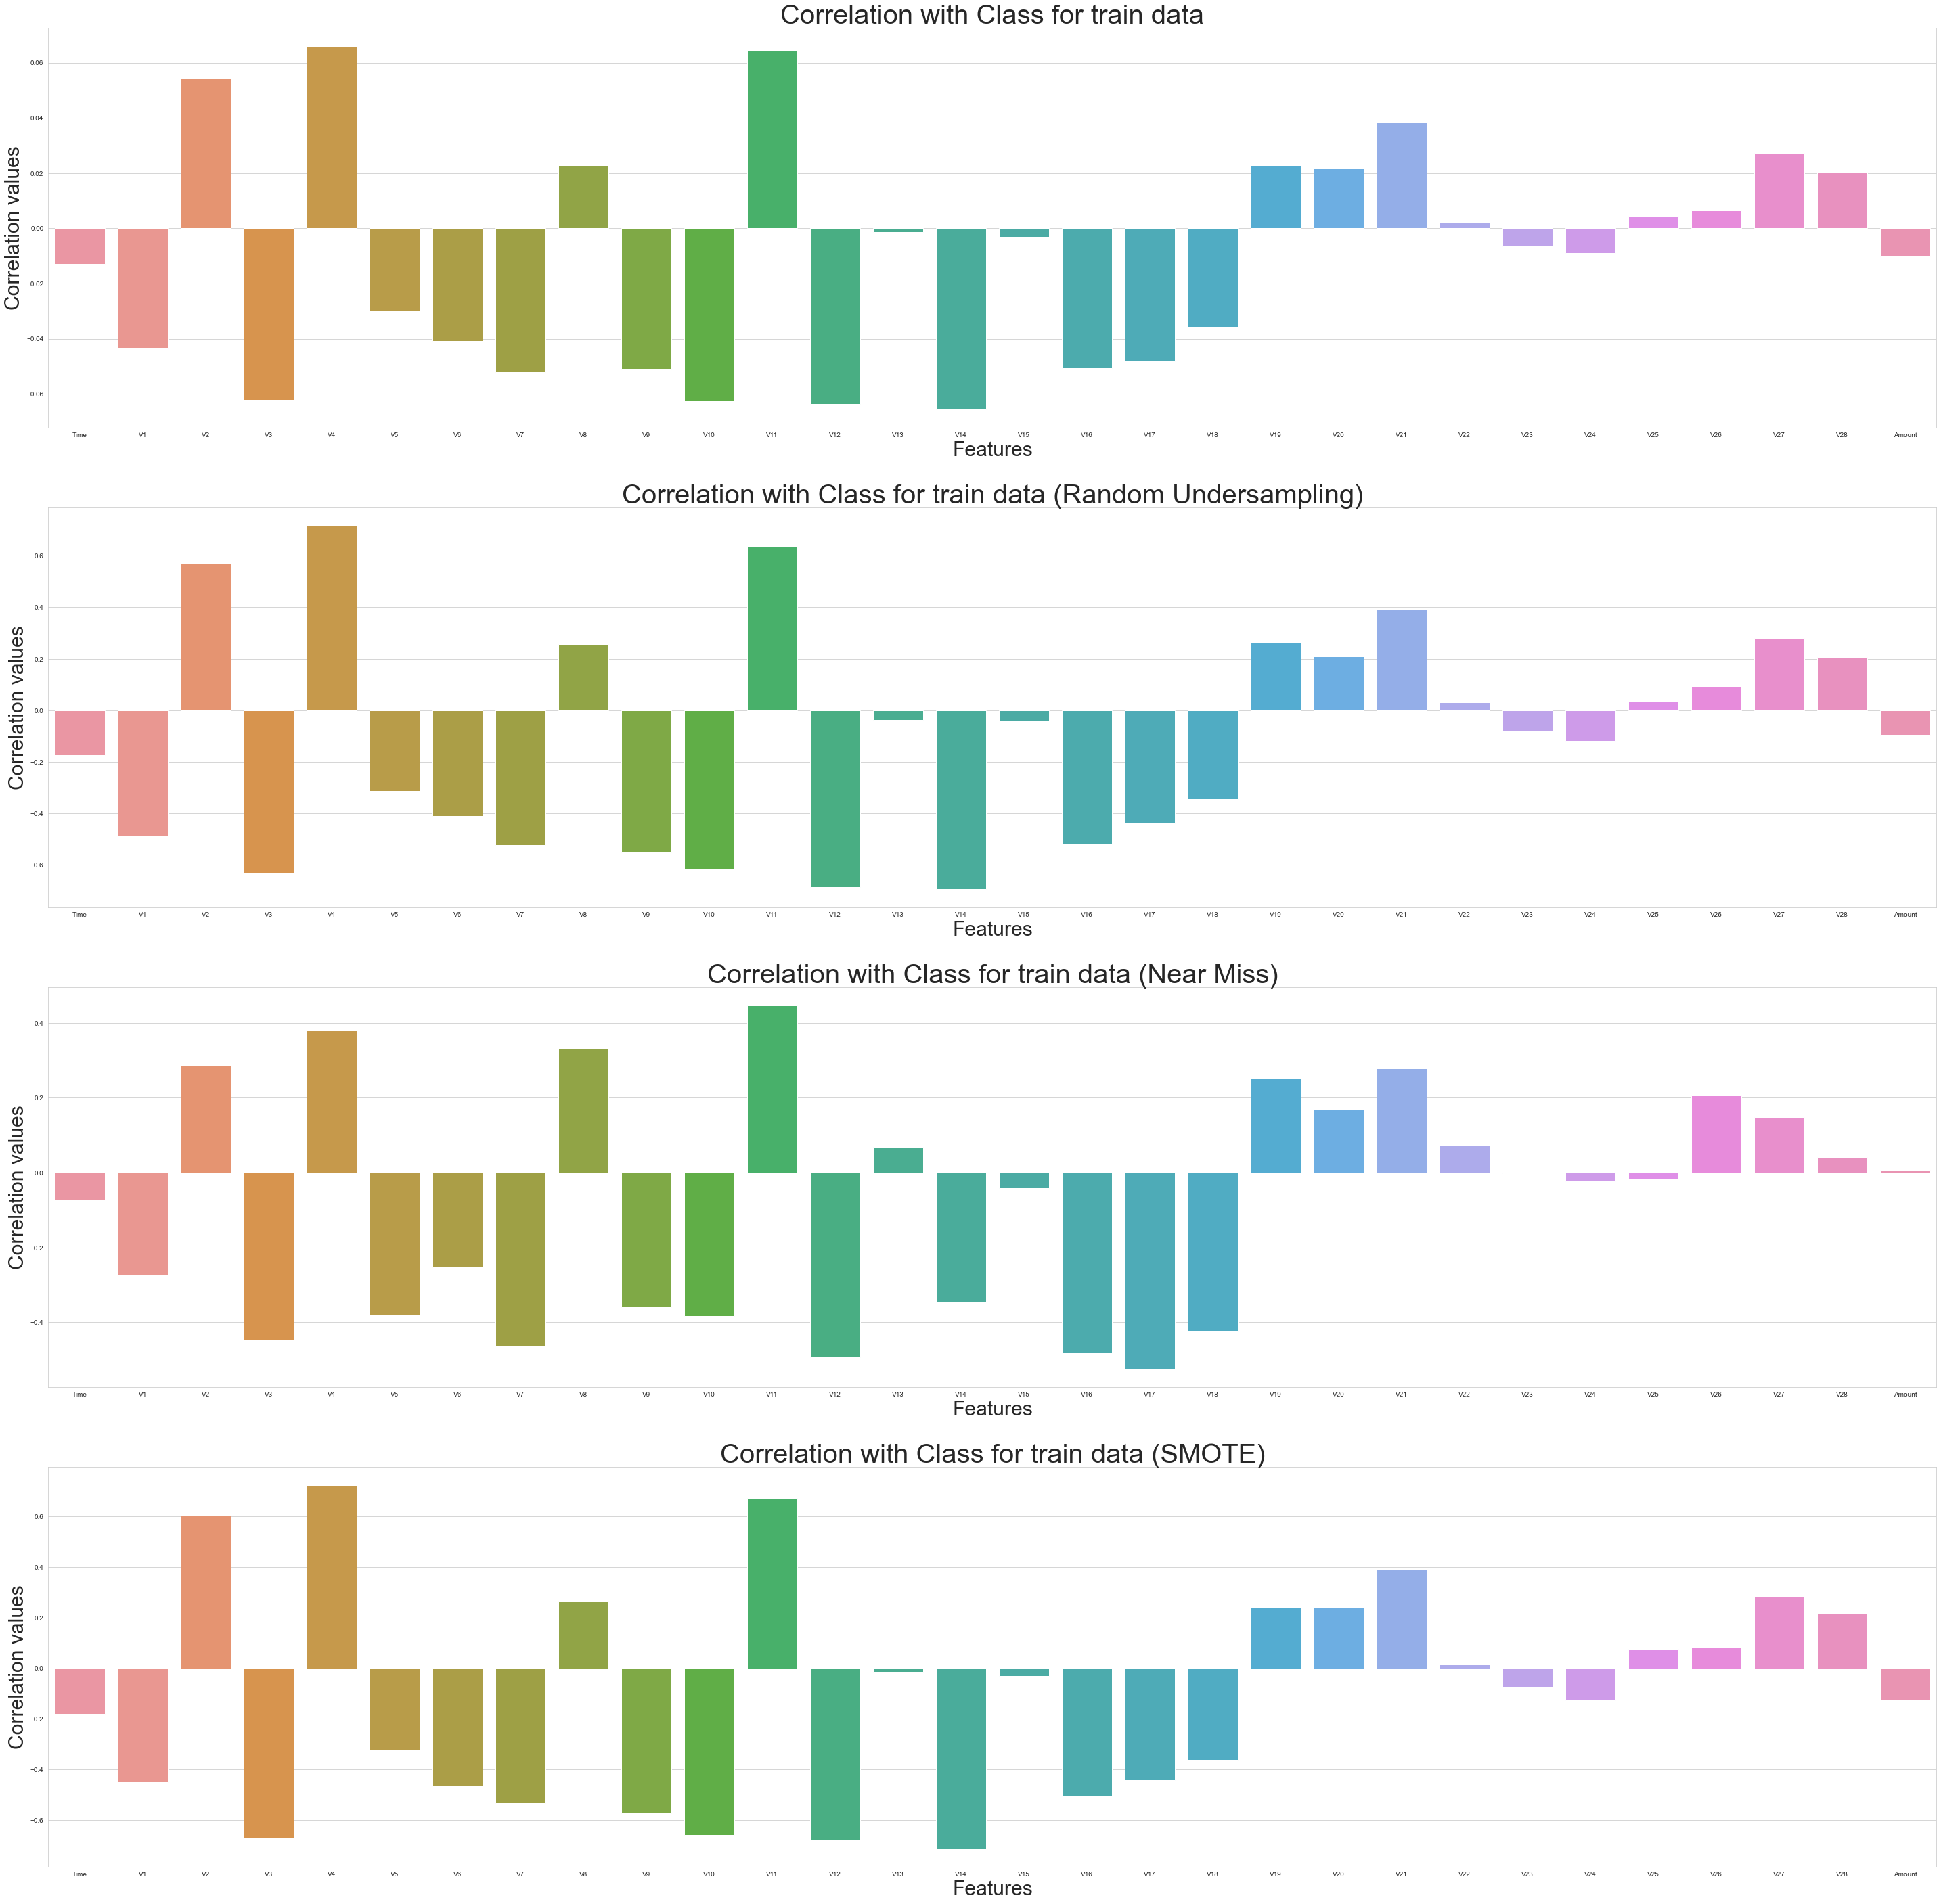

In [70]:
#Correlation with class
fig, axes = plt.subplots(nrows=4, figsize = (50,50))
train_data_O_2 = train_data_O.drop(columns = ['Class'])
#train_corr = train_data_O_2.corrwith(train_data_O.Class).plot.bar( title = "Correlation with Class for train data", fontsize = 20,                                                #rot = 45, grid = True, ax = axes[0])
train_corr = train_data_O_2.corrwith(train_data_O.Class)
sns.barplot(train_corr.index,train_corr.values,ax = axes[0])
axes[0].set_title("Correlation with Class for train data",fontsize = 40)
axes[0].set_xlabel("Features", fontsize = 30)
axes[0].set_ylabel("Correlation values", fontsize = 30)



train_data_ru_2 = train_data_ru.drop(columns = ['Class'])
train_corr_ru = train_data_ru_2.corrwith(train_data_ru.Class)
sns.barplot(train_corr_ru.index,train_corr_ru.values,ax = axes[1])
axes[1].set_title("Correlation with Class for train data (Random Undersampling)",fontsize = 40)
axes[1].set_xlabel("Features", fontsize = 30)
axes[1].set_ylabel("Correlation values", fontsize = 30)
# train_data_ru_2.corrwith(train_data_ru.Class).plot.bar( title = "Correlation with Class for train data (Random Undersampling)", fontsize = 20,
#                                                        rot = 45, grid = True, ax = axes[1])
train_data_nm_2 = train_data_nm.drop(columns = ['Class'])
train_corr_nm = train_data_nm_2.corrwith(train_data_nm.Class)
sns.barplot(train_corr_nm.index,train_corr_nm.values,ax = axes[2])
axes[2].set_title("Correlation with Class for train data (Near Miss)",fontsize = 40)
axes[2].set_xlabel("Features", fontsize = 30)
axes[2].set_ylabel("Correlation values", fontsize = 30)

train_data_sm_2 = train_data_sm.drop(columns = ['Class'])
train_corr_sm = train_data_sm_2.corrwith(train_data_sm.Class)
sns.barplot(train_corr_sm.index,train_corr_sm.values,ax = axes[3])
axes[3].set_title("Correlation with Class for train data (SMOTE)",fontsize = 40)
axes[3].set_xlabel("Features", fontsize = 30)
axes[3].set_ylabel("Correlation values", fontsize = 30)



The original normalized and standardized data doesnt show lot of correlation amongst its features. However after the data imbalance problem is addressed, certain degree of correlation is observed between several features.

# Predictive Modelling using Neural Networks

In [71]:
def plotLearningCurve(history,epochs,text):
  epochRange = range(1,epochs+1)
  plt.figure(figsize = (10,10))
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy for ' + text)
  plt.xlabel('Epoch', fontsize = 20)
  plt.ylabel('Accuracy', fontsize = 20)
  plt.legend(['Training set','Validation set'])
  plt.show()
  
  plt.figure(figsize = (10,10))
  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss for ' + text)
  plt.xlabel('Epoch', fontsize = 20)
  plt.ylabel('Loss', fontsize = 20)
  plt.legend(['Training set','Validation set'])
  plt.show()

In [72]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Artificial Neural Network

In [73]:
def ann_model(X_train,X_test,y_train,y_test,epochs):
#Building the model using Keras functional API
    print("----Building the model----")
    i = Input(shape=X_train[0].shape) #defining input
    x = Dense(units=16, activation='relu')(i) #adding convolution layers
    x = Dense(units=24,activation='relu')(x) #dropout regularization
    x = Dropout(0.1)(x)
    x = Dense(24,activation='relu')(x)
    x = Dense(24,activation='relu')(x)
    x = Dense(1,activation='sigmoid')(x)
    model = Model(i,x)
    model.summary()  
    
# ])
#Training the Artificial Neural Network
    print("----Training the network----")
    model.compile(optimizer= 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    r = model.fit(X_train,y_train, 
                  validation_data = (X_test,y_test), 
                  epochs = epochs, 
                  verbose = 2)
    print("Train score:", model.evaluate(X_train, y_train))
    print("Test score:", model.evaluate(X_test, y_test))
    
    return r,model

In [74]:
### ANN for Random Undersampling dataset
X_train = Xtrain_ru.values
y_train = ytrain_ru.values
X_test = Xtest_O.values
y_test = ytest.values
r_ru,model_ru = ann_model(X_train,X_test,y_train,y_test,epochs =20)

----Building the model----
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None

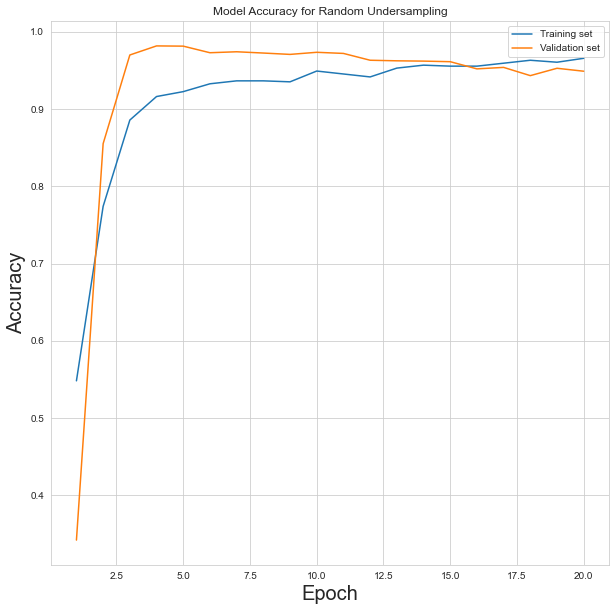

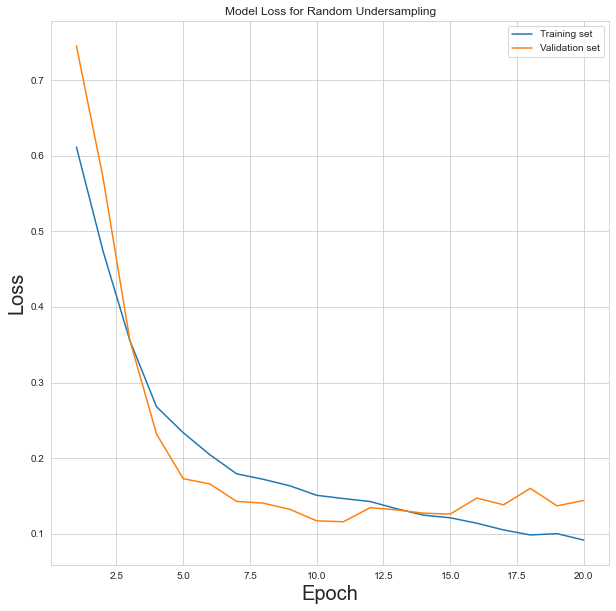

In [75]:
plotLearningCurve(r_ru,20,'Random Undersampling')

ANN Accuracy for random undersampling : 94.90%


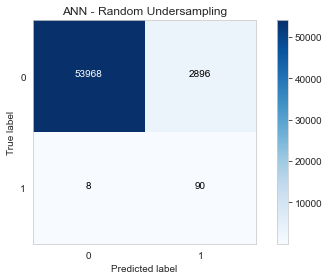

In [76]:
pred_ru =model_ru.predict(X_test)>0.5

score_ru = accuracy_score(y_test,pred_ru)
print("ANN Accuracy for random undersampling :", "{:.2f}%".format(100*score_ru))
plot_confusion_matrix(confusion_matrix(y_test,pred_ru),classes=[0,1],title = 'ANN - Random Undersampling')
plt.grid(False)
plt.show()

In [77]:
### ANN for Near Miss Algorithm dataset
X_train = Xtrain_nm.values
y_train = ytrain_nm.values
X_test = Xtest_O.values
y_test = ytest.values
r_nm,model_nm = ann_model(X_train,X_test,y_train,y_test,epochs =20)

----Building the model----
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_9 (Dense)              (No

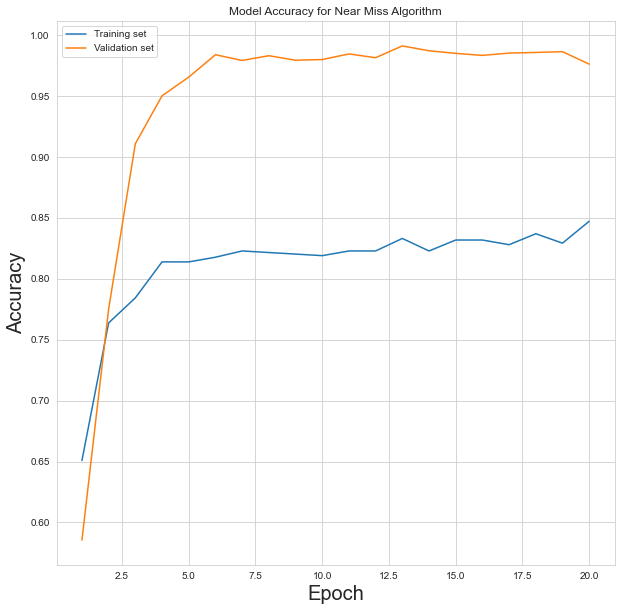

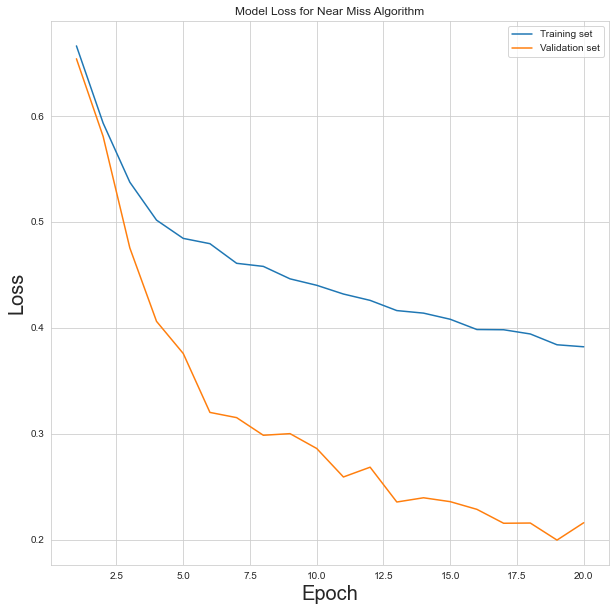

In [78]:
plotLearningCurve(r_nm,20,'Near Miss Algorithm')

ANN Accuracy for Near Miss Algorithm : 97.62%


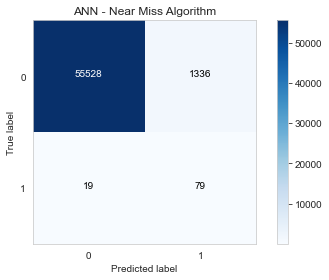

In [79]:
pred_nm =model_nm.predict(X_test)>0.5

score_nm = accuracy_score(y_test,pred_nm)
print("ANN Accuracy for Near Miss Algorithm :", "{:.2f}%".format(100*score_nm))
plot_confusion_matrix(confusion_matrix(y_test,pred_nm),classes=[0,1],title = 'ANN - Near Miss Algorithm')
plt.grid(False)
plt.show()

In [80]:
### ANN for SMOTE Algorithm dataset
X_train = Xtrain_sm.values
y_train = ytrain_sm.values
X_test = Xtest_O.values
y_test = ytest.values
r_sm,model_sm = ann_model(X_train,X_test,y_train,y_test,epochs =5)

----Building the model----
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_14 (Dense)             (No

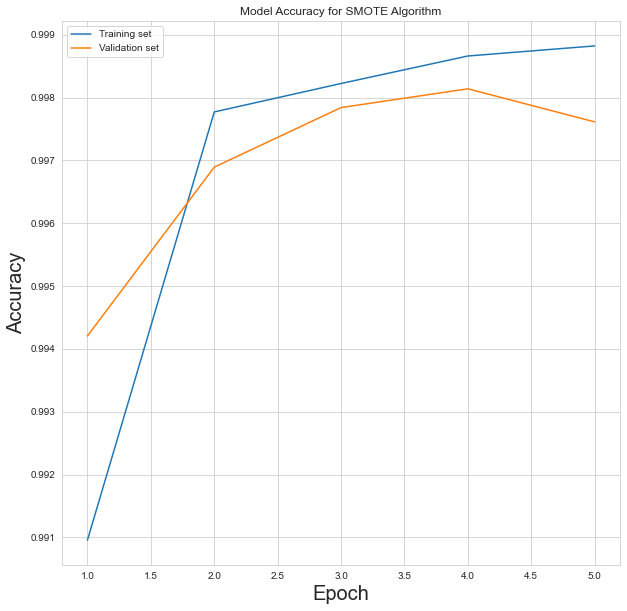

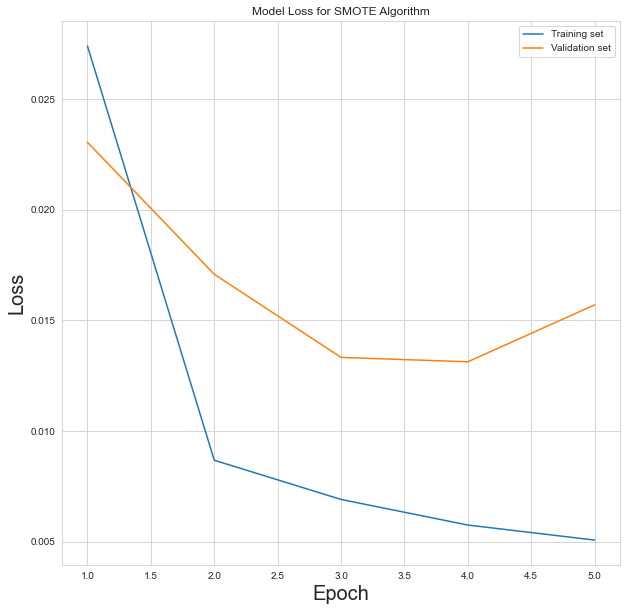

In [81]:
plotLearningCurve(r_sm,5,'SMOTE Algorithm')

ANN Accuracy for SMOTE Algorithm : 99.76%


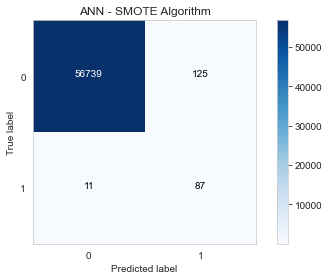

In [83]:
pred_sm =model_sm.predict(X_test)>0.5

score_sm = accuracy_score(y_test,pred_sm)
print("ANN Accuracy for SMOTE Algorithm :", "{:.2f}%".format(100*score_sm))
plot_confusion_matrix(confusion_matrix(y_test,pred_sm),classes=[0,1],title = 'ANN - SMOTE Algorithm')
plt.grid(False)
plt.show()

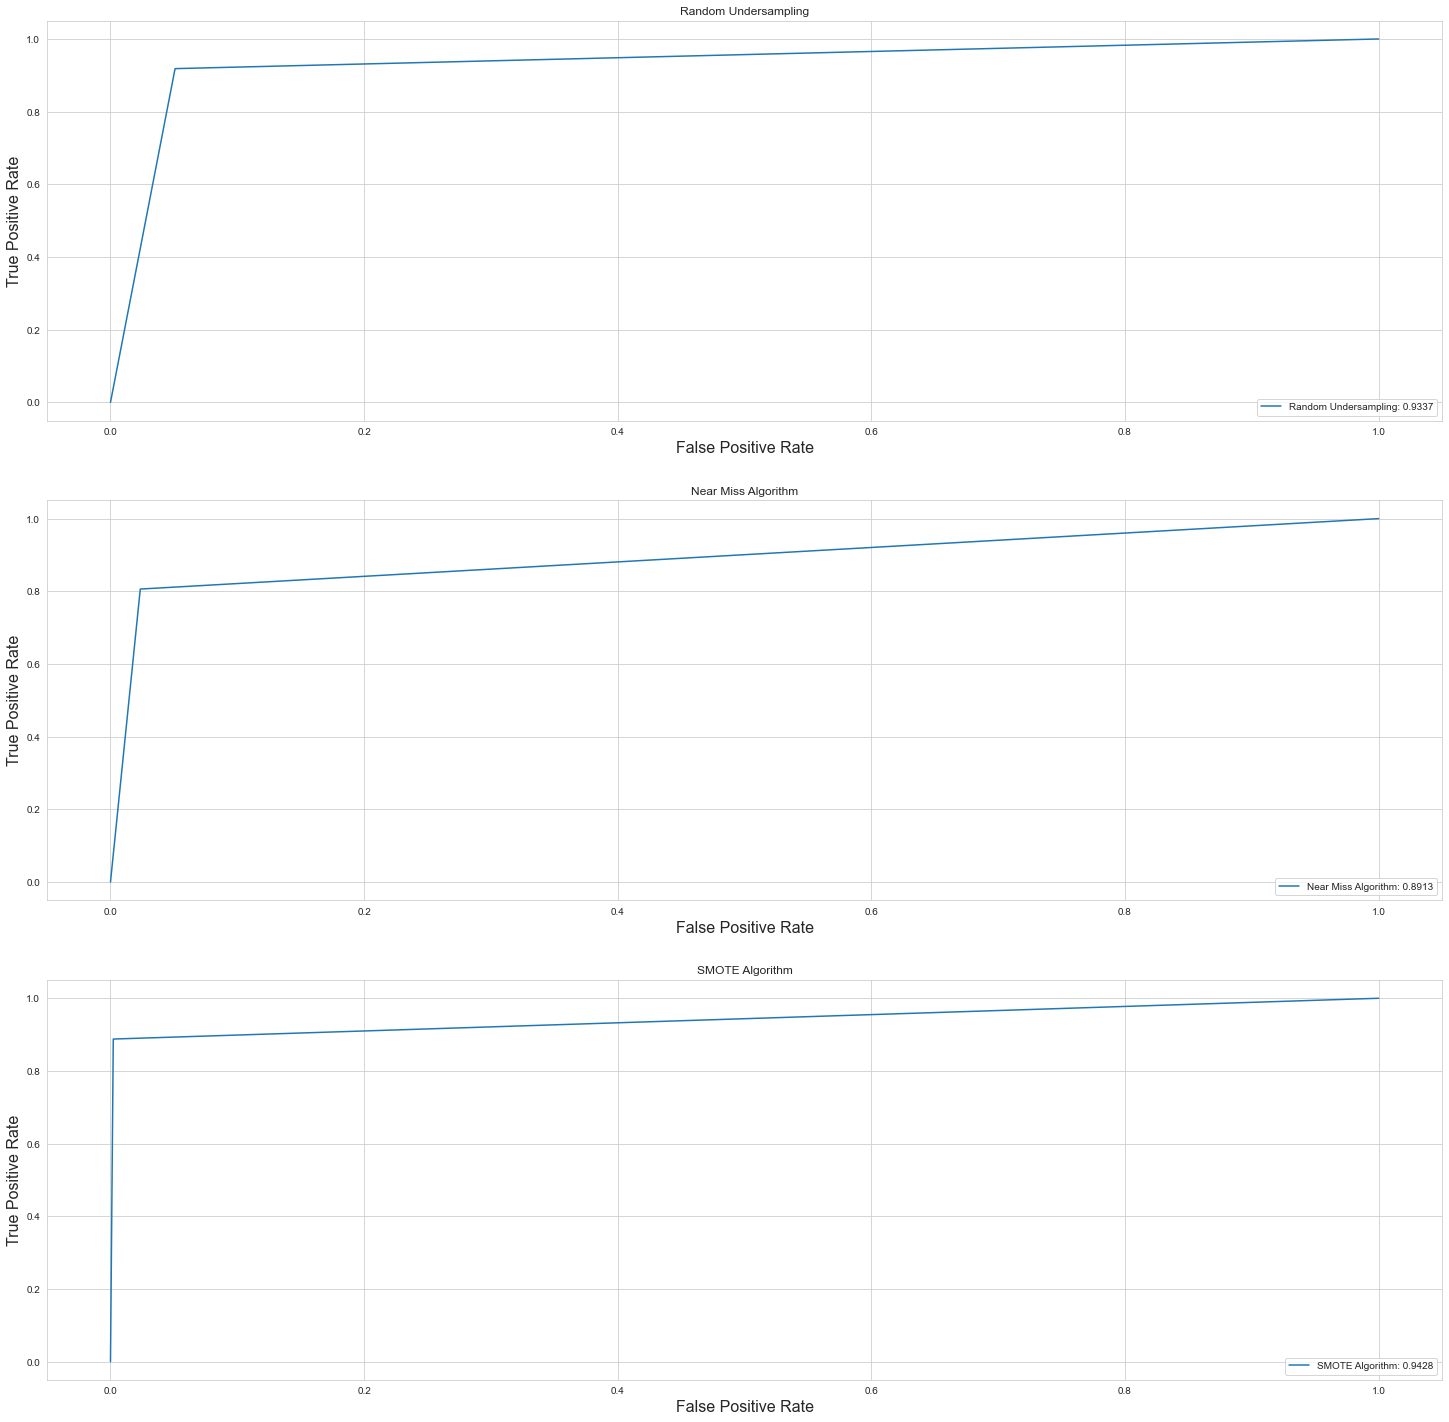

In [84]:
fig, axes = plt.subplots(nrows=3, figsize = (25,25))
ru_fpr, ru_tpr, ru_thresold = roc_curve(y_test, pred_ru)
nm_fpr, nm_tpr, nm_threshold = roc_curve(y_test, pred_nm)
sm_fpr, sm_tpr, sm_threshold = roc_curve(y_test, pred_sm)

axes[0].plot(ru_fpr, ru_tpr, label='Random Undersampling: {:.4f}'.format(roc_auc_score(y_test, pred_ru)))
axes[0].set_xlabel('False Positive Rate', fontsize=16)
axes[0].set_ylabel('True Positive Rate', fontsize=16)
axes[0].set_title('Random Undersampling')
axes[0].legend(loc = 'lower right')


axes[1].plot(nm_fpr, nm_tpr, label='Near Miss Algorithm: {:.4f}'.format(roc_auc_score(y_test, pred_nm)))
axes[1].set_xlabel('False Positive Rate', fontsize=16)
axes[1].set_ylabel('True Positive Rate', fontsize=16)
axes[1].set_title('Near Miss Algorithm')
axes[1].legend(loc = 'lower right')

axes[2].plot(sm_fpr, sm_tpr, label='SMOTE Algorithm: {:.4f}'.format(roc_auc_score(y_test, pred_sm)))
axes[2].set_xlabel('False Positive Rate', fontsize=16)
axes[2].set_ylabel('True Positive Rate', fontsize=16)
axes[2].set_title('SMOTE Algorithm')
axes[2].legend(loc = 'lower right')

### Convolutional Neural Network

In [85]:
def cnn_model(X_train,X_test,y_train,y_test,epochs):
#Building the model using Keras functional API
    print("----Building the model----")
    i = Input(shape=X_train[0].shape) #defining input
    x = Conv1D(32,2, activation= 'relu')(i) #adding convolution layers
    x = BatchNormalization()(x) #dropout regularization
    x = Conv1D(64,2,activation='relu')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(64,activation='relu')(x)
    x = Dense(1,activation='sigmoid')(x)
    model = Model(i,x)
    model.summary()
#Training the Convolutional Neural Network
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience=10,
                               restore_best_weights=True)
    r = model.fit(X_train,y_train, 
                  validation_data = (X_test,y_test), 
                  epochs = epochs, 
                  verbose = 2,
                  callbacks = [early_stop])
    print("Train score:", model.evaluate(X_train, y_train))
    print("Test score:", model.evaluate(X_test, y_test))
    
    return r,model
    
      
    

In [86]:
### CNN for Random Undersampling dataset
X_train = Xtrain_ru.values
y_train = ytrain_ru.values
X_test = Xtest_O.values
y_test = ytest.values

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
r_ru,model_ru = cnn_model(X_train,X_test,y_train,y_test,epochs = 20)

----Building the model----
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense_15 (Dense)             (No

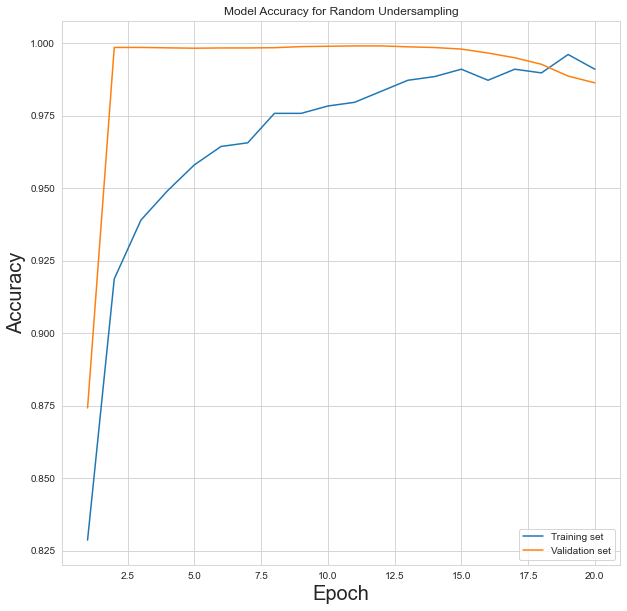

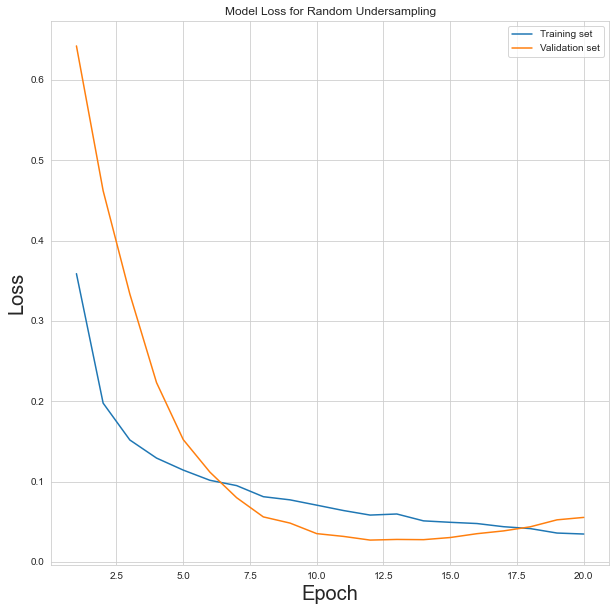

In [87]:
plotLearningCurve(r_ru,20,'Random Undersampling')

CNN Accuracy for random undersampling : 98.64%


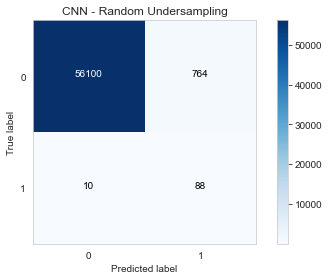

In [88]:
pred_ru =model_ru.predict(X_test)>0.5

score_ru = accuracy_score(y_test,pred_ru)
print("CNN Accuracy for random undersampling :", "{:.2f}%".format(100*score_ru))
plot_confusion_matrix(confusion_matrix(y_test,pred_ru),classes=[0,1],title = 'CNN - Random Undersampling')
plt.grid(False)
plt.show()

In [89]:
### CNN for Near Miss Algorithm dataset
X_train = Xtrain_nm.values
y_train = ytrain_nm.values
X_test = Xtest_O.values
y_test = ytest.values

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
r_nm,model_nm = cnn_model(X_train,X_test,y_train,y_test,epochs = 20)

----Building the model----
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_17 (Dense)             (No

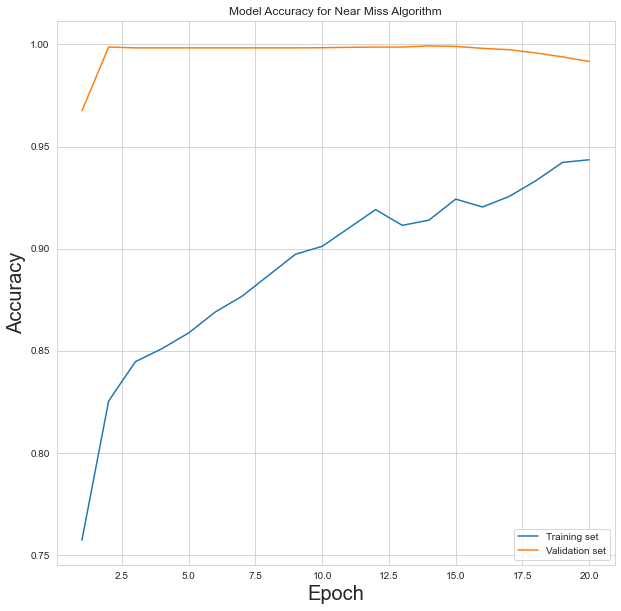

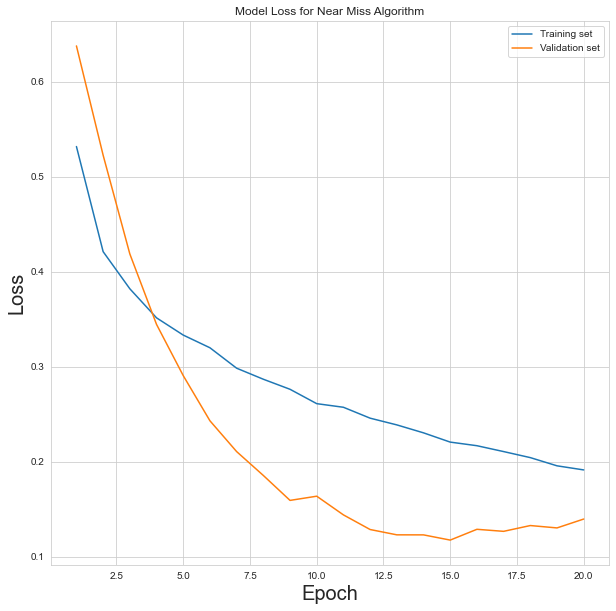

In [90]:
plotLearningCurve(r_nm,20,'Near Miss Algorithm')

CNN Accuracy for Near Miss Algorithm : 99.16%


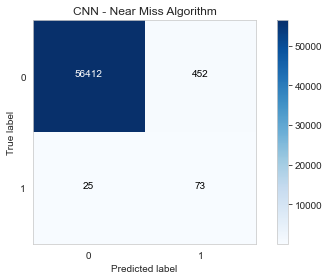

In [91]:
pred_nm =model_nm.predict(X_test)>0.5

score_nm= accuracy_score(y_test,pred_nm)
print("CNN Accuracy for Near Miss Algorithm :", "{:.2f}%".format(100*score_nm))
plot_confusion_matrix(confusion_matrix(y_test,pred_nm),classes=[0,1],title = 'CNN - Near Miss Algorithm')
plt.grid(False)
plt.show()

In [92]:
### CNN for SMOTE Algorithm dataset
X_train = Xtrain_sm.values
y_train = ytrain_sm.values
X_test = Xtest_O.values
y_test = ytest.values

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
r_sm,model_sm = cnn_model(X_train,X_test,y_train,y_test,epochs = 5)

----Building the model----
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_19 (Dense)             (No

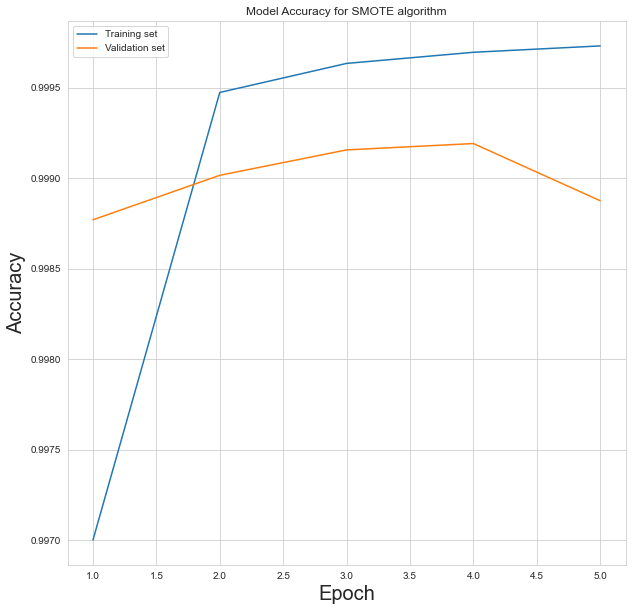

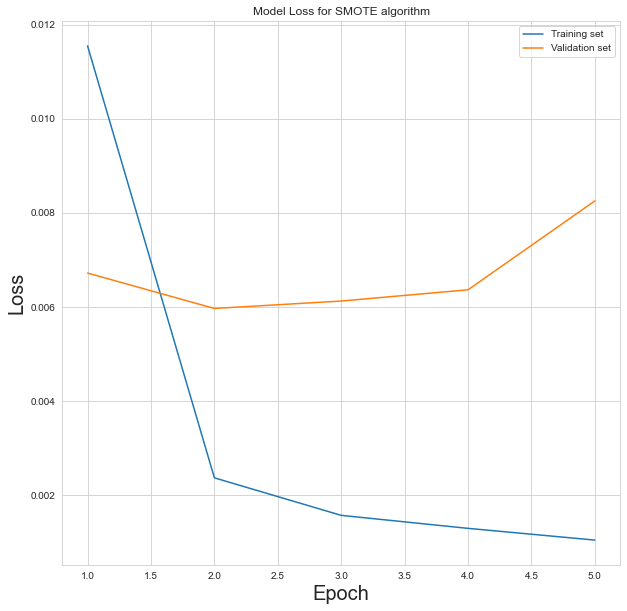

In [93]:
plotLearningCurve(r_sm,5,'SMOTE algorithm')

CNN Accuracy for SMOTE Algorithm : 99.89%


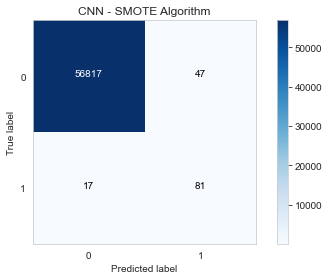

In [94]:
pred_sm =model_sm.predict(X_test)>0.5

score_sm= accuracy_score(y_test,pred_sm)
print("CNN Accuracy for SMOTE Algorithm :", "{:.2f}%".format(100*score_sm))
plot_confusion_matrix(confusion_matrix(y_test,pred_sm),classes=[0,1],title = 'CNN - SMOTE Algorithm')
plt.grid(False)
plt.show()

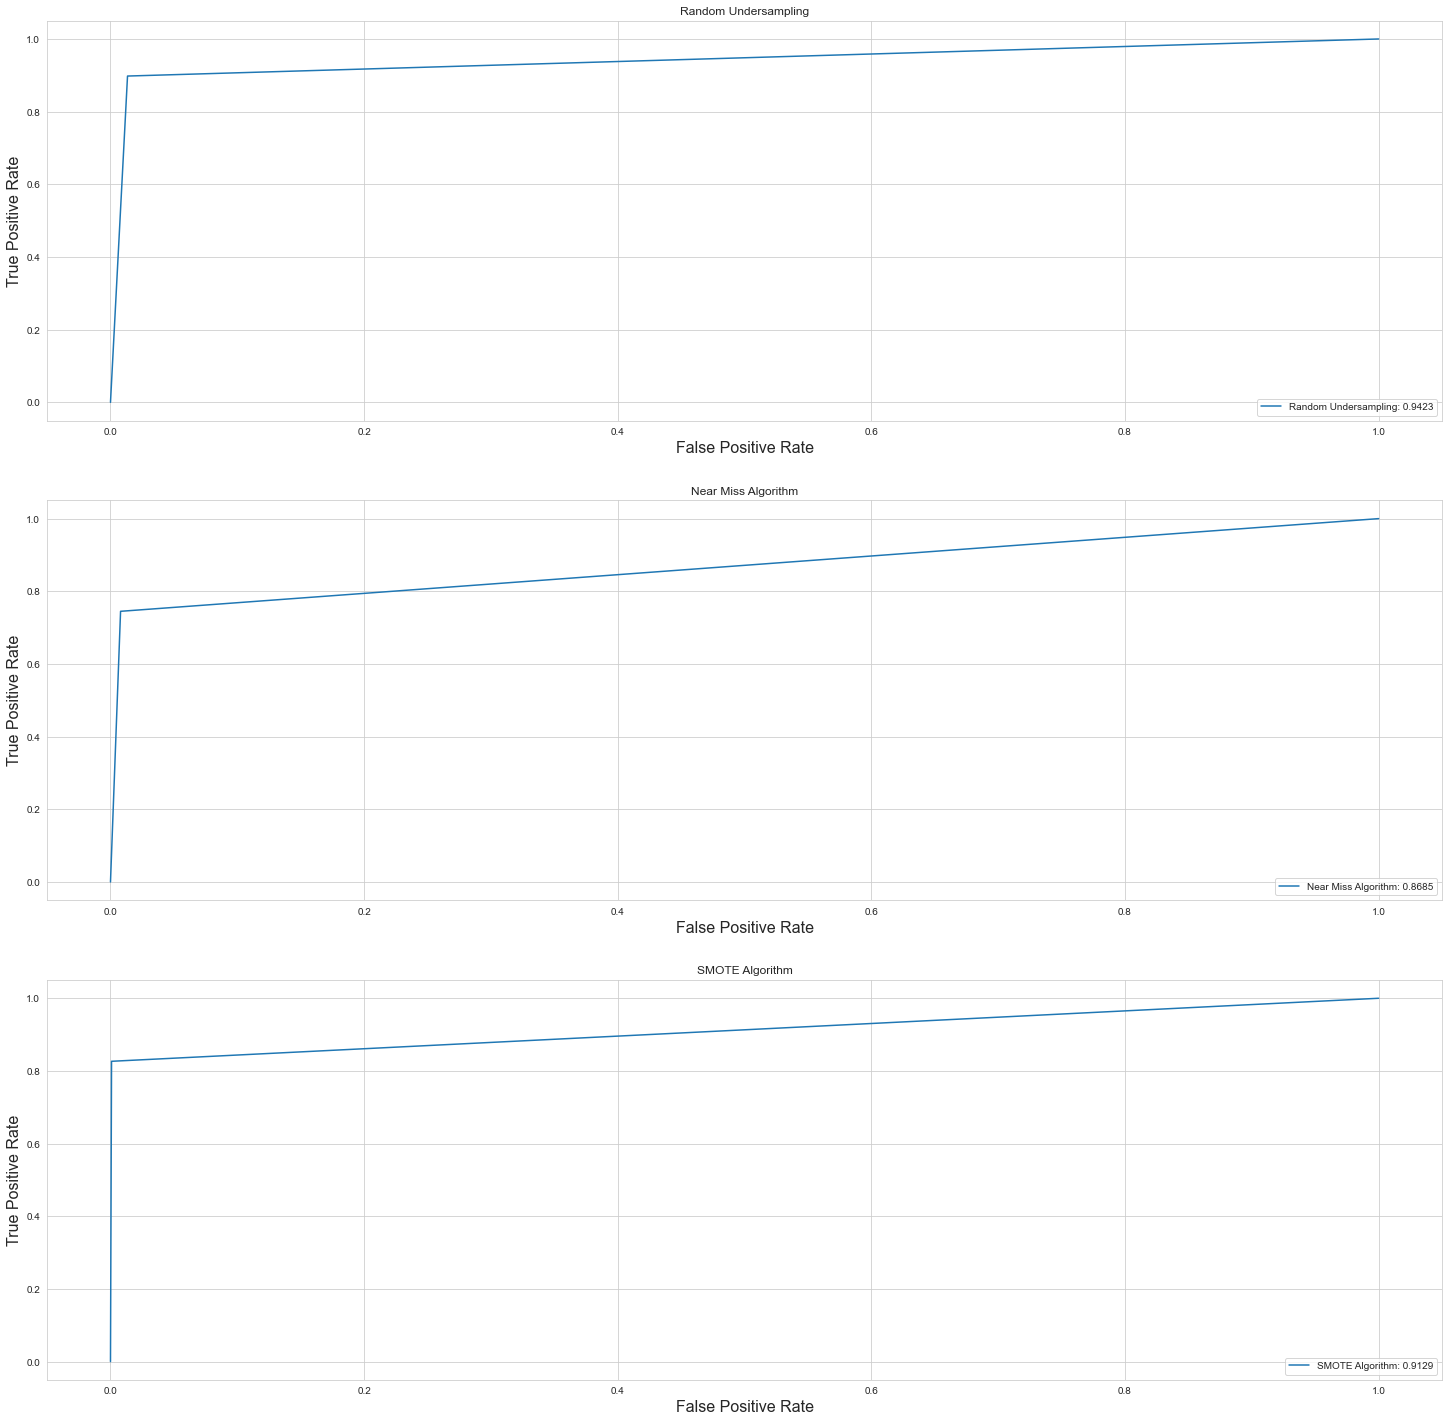

In [95]:
fig, axes = plt.subplots(nrows=3, figsize = (25,25))
ru_fpr, ru_tpr, ru_thresold = roc_curve(y_test, pred_ru)
nm_fpr, nm_tpr, nm_threshold = roc_curve(y_test, pred_nm)
sm_fpr, sm_tpr, sm_threshold = roc_curve(y_test, pred_sm)

axes[0].plot(ru_fpr, ru_tpr, label='Random Undersampling: {:.4f}'.format(roc_auc_score(y_test, pred_ru)))
axes[0].set_xlabel('False Positive Rate', fontsize=16)
axes[0].set_ylabel('True Positive Rate', fontsize=16)
axes[0].set_title('Random Undersampling')
axes[0].legend(loc = 'lower right')


axes[1].plot(nm_fpr, nm_tpr, label='Near Miss Algorithm: {:.4f}'.format(roc_auc_score(y_test, pred_nm)))
axes[1].set_xlabel('False Positive Rate', fontsize=16)
axes[1].set_ylabel('True Positive Rate', fontsize=16)
axes[1].set_title('Near Miss Algorithm')
axes[1].legend(loc = 'lower right')

axes[2].plot(sm_fpr, sm_tpr, label='SMOTE Algorithm: {:.4f}'.format(roc_auc_score(y_test, pred_sm)))
axes[2].set_xlabel('False Positive Rate', fontsize=16)
axes[2].set_ylabel('True Positive Rate', fontsize=16)
axes[2].set_title('SMOTE Algorithm')
axes[2].legend(loc = 'lower right')

plt.show()